# ITCS 3156 Final Project 
$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> *Devdan Ferguson* </span>

## Utils

In [177]:
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
import seaborn as sns


## Metrics

In [117]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

In [4]:
card_list = pd.read_csv("All_Precons_2024-11-11.csv", low_memory=False)

## Introduction

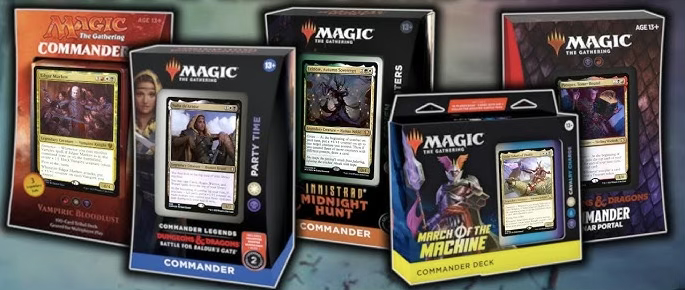

Image Source: https://i.ytimg.com/vi/AmqsFYAfhmo/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLDUPqW0YfpI6Hy2bFo0QjFWlolADg

Magic: the Gathering is one of the most prolific trading card games played in the world, with an estimated 50 million players worldwide (source: https://investor.hasbro.com/magic-gathering). Invented in 1993 by combinatorics PhD Richard Garfield, Magic (or MTG) is built around a core deck-building system; players assemble cards with synonymous and synergistic abilities that complement one another, and then include the resources designed to best enable their deck to achieve the route they have chosen to attempt to win the game. 

The core of the game revolves around the "color wheel:" Magic's cards can be any combination (or none) of five colors: white, blue, black, red, and green, each of which have their own identities associated with them mechanically. Mana is the resource of the game, being spent to play cards and activate abilities, and can be any of these five colors, or colorless. 

Magic can be played in several formats, the most popular of which is Commander, also known as EDH (short for Elder Dragon Highlander). EDH sees a player have an eponymous "commander" for their deck, typically a legendary creature (a kind of card intended to represent a story significant character), whose colors dictate what cards can be used in the deck. The decks can also only have one copy of each card (barring a few exceptions), hence the name Highlander (a reference to the movie of the same name and its tagline, "there can only be one"). 

Although several formats have had them, EDH is also notable for the preconstructed, or "precon" decks released for the format. At what was originally a rate of once per year, but is now once per release, with several per year being released. Preconstructed decks are designed to be approachable, and generally represent common archetypes a player might build their own deck around. 

On Moxfield (a popular half-social media, half-database that users can submit their decklists to), there is documentation of every preconstructed deck ever released. On https://github.com/Westly/CommanderPrecons, a web scraped CSV file from Moxfield of every card included in every preconstructed deck can be found, and that is where we begin. 

## Data Exploration

In [5]:
card_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14908 entries, 0 to 14907
Columns: 182 entries, id to info.starcitygames_etched_url
dtypes: bool(15), float64(100), int64(1), object(66)
memory usage: 19.2+ MB


In [6]:
card_list.describe()

,likeCount,viewCount,commentCount,quantity,info.cmc,info.type,info.edhrec_rank,info.cardmarket_id,info.tcgplayer_id,info.cardkingdom_id,...,meld_result,cardkingdom_etched_id,cardKingdomEtchedUrl,frame_effects,isToken,defaultFinish,info.cardkingdom_foil_id,info.mtgo_id,info.arena_id,info.cardkingdom_etched_id
count,12874.000000,12874.000000,12874.000000,12874.000000,14908.000000,14793.000000,13041.000000,12065.000000,13446.000000,12467.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2871.000000,8400.000000,548.000000,29.000000
mean,98.029905,38757.315830,3.629874,1.212288,2.564730,5.052119,4043.613220,566053.561293,333320.484828,254242.374990,...,NaN,NaN,NaN,NaN,NaN,NaN,280169.944619,101421.634286,82556.178832,279398.310345
std,72.146000,29347.471284,4.406176,1.475790,2.253037,2.112455,4531.635613,189365.304961,175479.368746,35000.172862,...,NaN,NaN,NaN,NaN,NaN,NaN,20541.373605,27722.134248,6820.758993,13418.140919
min,4.000000,3791.000000,0.000000,1.000000,0.000000,2.000000,1.000000,12154.000000,12135.000000,111955.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,112254.000000,21461.000000,70664.000000,256448.000000
25%,34.000000,11441.000000,0.000000,1.000000,0.000000,3.000000,428.000000,361805.000000,171470.250000,221056.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,266421.500000,88152.500000,76688.500000,270190.000000
50%,87.000000,29241.000000,2.000000,1.000000,3.000000,4.000000,2285.000000,652892.000000,274121.000000,261913.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,285112.000000,110517.000000,82320.000000,279529.000000
75%,139.000000,63323.000000,7.000000,1.000000,4.000000,7.000000,6431.000000,738615.000000,519301.000000,283984.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,297603.500000,124705.500000,89204.500000,291531.000000
max,324.000000,120066.000000,17.000000,32.000000,12.000000,12.000000,27741.000000,789156.000000,579362.000000,306034.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,303433.000000,132593.000000,94220.000000,297634.000000


In [7]:
card_list

,id,name,format,likeCount,viewCount,commentCount,publicUrl,publicId,quantity,boardType,...,Deck Section,info.mtgo_id,info.arena_id,info.meld_part,info.meld_result,info.cardkingdom_etched_id,info.cardKingdomEtchedUrl,info.cardTraderEtchedUrl,info.starcitygames_etched_sku,info.starcitygames_etched_url
0,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,94218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**LIST OF FEATURES** (with a few notable ones highlighted): 
- 'name' holds the name of the deck the card the is from
- 'boardType' holds whether or not the card is in the main deck or is the commander
- 'info.name' holds the name of the card

In [8]:
card_list.columns.tolist()

['id',
 'name',
 'format',
 'likeCount',
 'viewCount',
 'commentCount',
 'publicUrl',
 'publicId',
 'quantity',
 'boardType',
 'finish',
 'isFoil',
 'isAlter',
 'isProxy',
 'useCmcOverride',
 'useManaCostOverride',
 'useColorIdentityOverride',
 'excludedFromColor',
 'info.id',
 'info.uniqueCardId',
 'info.scryfall_id',
 'info.set',
 'info.set_name',
 'info.name',
 'info.cn',
 'info.layout',
 'info.cmc',
 'info.type',
 'info.type_line',
 'info.oracle_text',
 'info.mana_cost',
 'info.power',
 'info.toughness',
 'info.colors',
 'info.color_indicator',
 'info.color_identity',
 'info.legalities',
 'info.frame',
 'info.reserved',
 'info.digital',
 'info.foil',
 'info.nonfoil',
 'info.etched',
 'info.glossy',
 'info.rarity',
 'info.border_color',
 'info.colorshifted',
 'info.flavor_text',
 'info.lang',
 'info.latest',
 'info.has_multiple_editions',
 'info.has_arena_legal',
 'info.prices',
 'info.card_faces',
 'info.artist',
 'info.promo_types',
 'info.cardHoarderUrl',
 'info.cardKingdomUrl',


#### In Magic, cards are played by spending mana on them. All cards have a mana cost, and this value is included in the feature "info.cmc." An essential part of constructing a deck is producing a balanced "curve," which, when visualized, should form a bell curve. We can access every mana cost in the decks like such: 

In [9]:
card_list["info.cmc"]

0        3.0
1        4.0
2        6.0
3        4.0
4        0.0
        ... 
14903    1.0
14904    2.0
14905    0.0
14906    5.0
14907    3.0
Name: info.cmc, Length: 14908, dtype: float64

Land cards are used to produce the mana you spend and, while they technically have a mana cost of 0, aren't included in the calculations of costs because you always can play at most 1, for no cost, each turn. Additionally, there are cards called "tokens" which are not part of the main deck and only enter gameplay when made by another card, and also have a mana value of 0. So, best practices would be to remove both of these when visualizing the mana costs. 

In [10]:
corrected_cmcs = card_list[~(card_list["info.type_line"].str.contains("Land", na = False))] #info.type_line stores the card's type, then we invert filtering for if the type line has the word "Land" in it
corrected_cmcs = corrected_cmcs[~(corrected_cmcs["info.layout"] == "token")] #info.layout stores the kind of card, then we invert filtering for tokens
corrected_cmcs = corrected_cmcs[~(corrected_cmcs["Deck Section"] == "tokens")] #in case of any tokens incorrectly labelled in info.layout


Then, with that we can count and visualize the mana curve across all decks: 

(seaborn histogram, https://www.statology.org/seaborn-normal-distribution/)

/Users/devdanferguson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


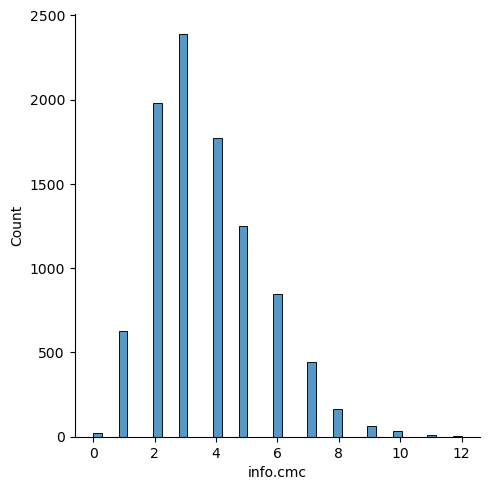

In [11]:
sns.displot(corrected_cmcs["info.cmc"])


In [12]:
card_list["name"]

0        Adaptive Enchantment (Commander 2018 Precon De...
1        Adaptive Enchantment (Commander 2018 Precon De...
2        Adaptive Enchantment (Commander 2018 Precon De...
3        Adaptive Enchantment (Commander 2018 Precon De...
4        Adaptive Enchantment (Commander 2018 Precon De...
                               ...                        
14903                                                  NaN
14904                                                  NaN
14905                                                  NaN
14906                                                  NaN
14907                                                  NaN
Name: name, Length: 14908, dtype: object

Here, we view the name of each precon deck, sorted alphabetically (removing nan which stems from rows with no deck name listed, following https://stackoverflow.com/questions/11620914/how-do-i-remove-nan-values-from-a-numpy-array -> https://stackoverflow.com/a/43475189)

In [13]:
deck_names = card_list["name"].unique()
deck_names = deck_names[~pd.isnull(deck_names)]
deck_names

array(['Adaptive Enchantment (Commander 2018 Precon Decklist)',
       'Ahoy Mateys (The Lost Caverns of Ixalan Commander Precon Decklist)',
       "Angels: They're Just Like Us, but Cooler and with Wings (Secret Lair Commander 2023 Precon Decklist)",
       'Animated Army (Bloomburrow Commander Precon Decklist)',
       'Arcane Maelstrom (Commander 2020 Precon Decklist)',
       'Arcane Wizardry (Commander 2017 Precon Decklist)',
       'Arm for Battle (Commander Legends Precon Decklist)',
       'Aura of Courage (Adventures in the Forgotten Realms Commander Precon Decklist)',
       'Bedecked Brokers (Streets of New Capenna Commander Precon Decklist)',
       'Blame Game (Murders at Karlov Manor Commander Precon Decklist)',
       'Blast from the Past (Doctor Who Commander Precon Decklist)',
       'Blood Rites  (The Lost Caverns of Ixalan Commander Precon Decklist)',
       'Breed Lethality (Commander 2016 Precon Decklist)',
       'Breed Lethality (Commander Anthology 2 Precon Deck

In [14]:
corrected_cmcs[corrected_cmcs["info.type_line"] == "Land"]

,id,name,format,likeCount,viewCount,commentCount,publicUrl,publicId,quantity,boardType,...,Deck Section,info.mtgo_id,info.arena_id,info.meld_part,info.meld_result,info.cardkingdom_etched_id,info.cardKingdomEtchedUrl,info.cardTraderEtchedUrl,info.starcitygames_etched_sku,info.starcitygames_etched_url


#### One specific "staple" card in Commander is "Sol Ring" – that is, it appears in virtually every single deck due to its versatility, strength, and accessibility. 

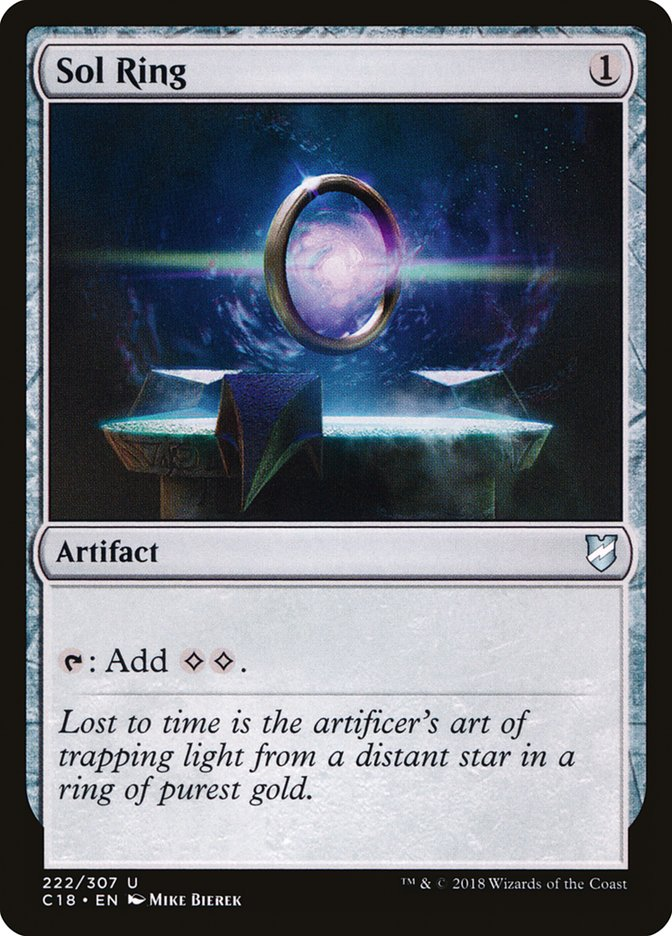

Image Source: https://cards.scryfall.io/large/front/8/3/83a0f2eb-2f6d-4aaa-b7a9-ea06d5de7eca.jpg?1592711340

We can index the card_list's "info.name" feature, which stores the name of the card (unhelpfully, the "name" feature holds the name of the deck the card is found in), by "Sol Ring." Then, we compare the number of decks with the number of sol rings found: 

In [15]:
print(f"Number of decks: {len(deck_names)}")
#Each row for whom, in [info.name], entry is 'Sol Ring', then count that
sol_ring = card_list[card_list["info.name"] == "Sol Ring"] #every row where info.name == "Sol Ring"
print(f"Number of sol rings: {len(sol_ring)}")

Number of decks: 156
Number of sol rings: 153


That's interesting, there are 3 decks listed without sol ring, yet they're considered a mainstay. Let's investigate, pulling the specific three deck's names who don't have sol ring. 

In [16]:
#then pull list of those rows and compare those and point out Painbow
no_sol_rings = deck_names
sol_ring_names = sol_ring["name"]
no_sol_rings = no_sol_rings[~np.isin(no_sol_rings, sol_ring_names)]
print(no_sol_rings)

['Deathdancer Xira (Magic Online Theme Deck Precon Decklist)'
 'Enchantress Rubinia (Magic Online Theme Deck Precon Decklist)'
 'Painbow (Dominaria United Commander Precon Decklist)']


Both Deathdancer Xira and Enchantress Rubinia are "Magic Online Theme Decks," existing in a digital version of the game and different from all of the other decks listed here (they were designed before commander decks were printed with sol rings as a standard). However, Painbow is a different situation. This is not an error in the dataset, but intentional design; drawing from an article by Star City Games, a reputable Magic outlet: 

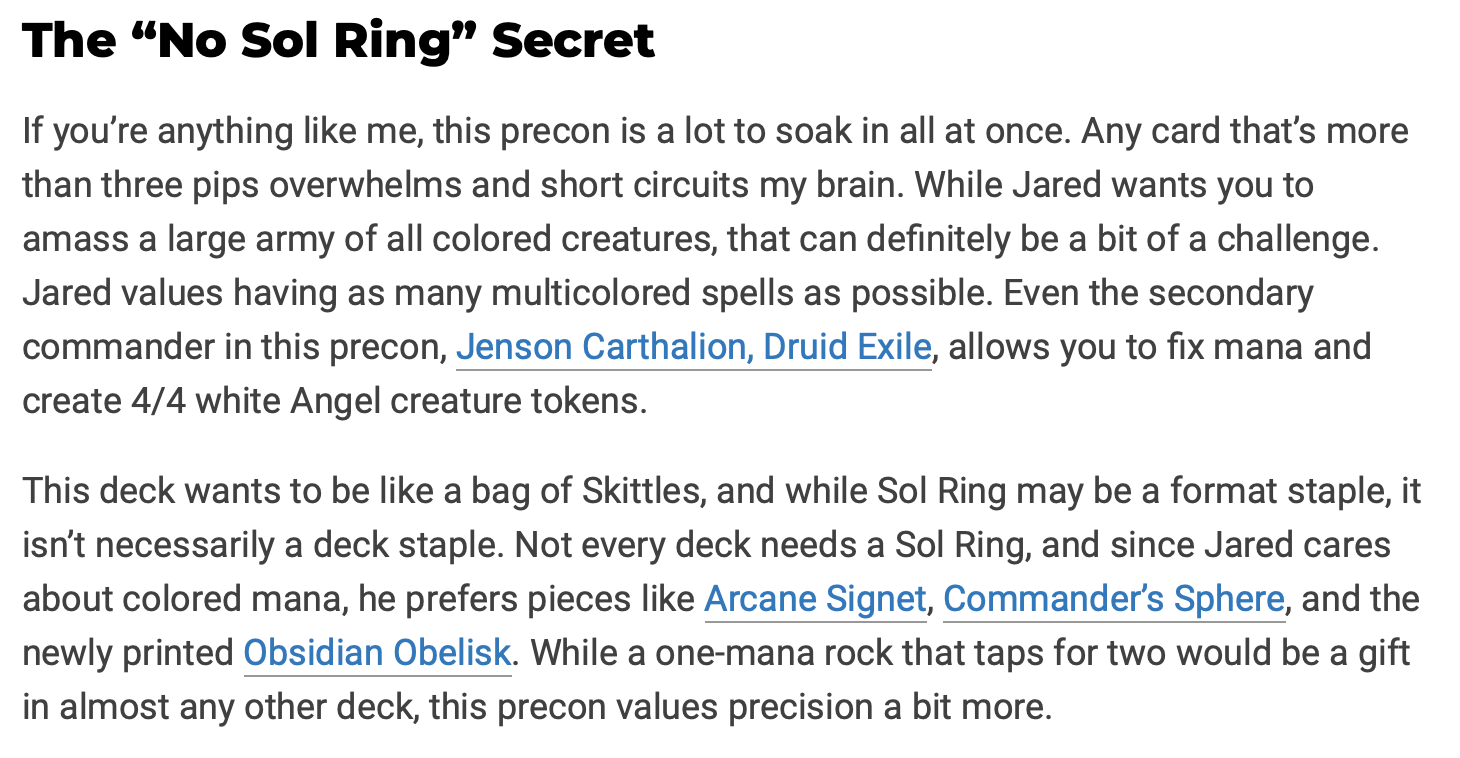

Source: https://articles.starcitygames.com/magic-the-gathering/painbow-breaking-down-the-most-intriguing-dominaria-united-commander-deck/

## Feature Engineering

First, we remove any rows and columns from the dataframe that have no values in them. 
(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [17]:
no_empty_card_list = card_list.dropna(axis = 0, how = 'all')
no_empty_card_list = card_list.dropna(axis = 1, how = 'all')
no_empty_card_list

,id,name,format,likeCount,viewCount,commentCount,publicUrl,publicId,quantity,boardType,...,Deck Section,info.mtgo_id,info.arena_id,info.meld_part,info.meld_result,info.cardkingdom_etched_id,info.cardKingdomEtchedUrl,info.cardTraderEtchedUrl,info.starcitygames_etched_sku,info.starcitygames_etched_url
0,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,commanderPrecons,24.0,7470.0,0.0,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,94218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tokens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
no_empty_card_list.columns

Index(['id', 'name', 'format', 'likeCount', 'viewCount', 'commentCount',
       'publicUrl', 'publicId', 'quantity', 'boardType', 'finish', 'isFoil',
       'isAlter', 'isProxy', 'useCmcOverride', 'useManaCostOverride',
       'useColorIdentityOverride', 'excludedFromColor', 'info.id',
       'info.uniqueCardId', 'info.scryfall_id', 'info.set', 'info.set_name',
       'info.name', 'info.cn', 'info.layout', 'info.cmc', 'info.type',
       'info.type_line', 'info.oracle_text', 'info.mana_cost', 'info.power',
       'info.toughness', 'info.colors', 'info.color_indicator',
       'info.color_identity', 'info.legalities', 'info.frame', 'info.reserved',
       'info.digital', 'info.foil', 'info.nonfoil', 'info.etched',
       'info.glossy', 'info.rarity', 'info.border_color', 'info.colorshifted',
       'info.flavor_text', 'info.lang', 'info.latest',
       'info.has_multiple_editions', 'info.has_arena_legal', 'info.prices',
       'info.card_faces', 'info.artist', 'info.promo_types',
      

As this data was scrubbed via the public tool Moxfield (which in-turn pulls data from several other platforms, including but not limited to Scryfall, EDHREC, etc), unnecessary features for the purposes of this project are dropped from the dataframe. 

In [19]:
pruned_card_list = no_empty_card_list.drop(["format", "likeCount", "viewCount", "commentCount"], axis = 1) #Drops the listed features, used for the social-media aspect of Moxfield
pruned_card_list = pruned_card_list.drop(["isAlter", "isProxy"], axis = 1) #Drops the listed features, used to denote variations on cards not found in preconstructed products
pruned_card_list = pruned_card_list.drop(["useCmcOverride", "useManaCostOverride", "useColorIdentityOverride", "excludedFromColor"], axis = 1) #Drops the listed features, used for backend purposes on Moxfield
pruned_card_list = pruned_card_list.drop(["info.id", "info.uniqueCardId", "info.scryfall_id"], axis = 1) #Drops ID information not necessary for the model
pruned_card_list = pruned_card_list.drop(["info.legalities", "info.colorshifted", "info.lang", "info.latest", "info.has_multiple_editions", "info.has_arena_legal", "info.prices"], axis = 1) #Drops additional unnecessary information
pruned_card_list = pruned_card_list.drop(["info.cardHoarderUrl", "info.cardKingdomUrl", "info.cardMarketUrl", "info.tcgPlayerUrl", "info.coolStuffIncUrl", "info.cardTraderUrl"], axis = 1) #Drops the features that holds URLs to online vendors for the cards
pruned_card_list = pruned_card_list.drop(["info.isArenaLegal"], axis = 1) #Drops a feature pertaining to an online version of the game unnecessary for classification
pruned_card_list = pruned_card_list.drop(["info.edhrec_rank", "info.multiverse_ids", "info.cardmarket_id", "info.tcgplayer_id", "info.cardkingdom_id"], axis = 1) #Drops the ids for the cards on other platforms
pruned_card_list = pruned_card_list.drop(["info.reprint", "info.set_type", "info.acorn", "info.image_seq", "info.content_warning", "info.isToken", "info.defaultFinish"], axis = 1) #Drops more unnecessary features 
pruned_card_list = pruned_card_list.drop(["info.starcitygames_sku", "info.starcitygames_url"], axis = 1) #Drops two features associated with another website
pruned_card_list = pruned_card_list.drop(["info.frame_effects"], axis = 1) #Another unnecessary feature of card information
pruned_card_list = pruned_card_list.drop(["info.cardKingdomFoilUrl", "info.cardkingdom_foil_id", "info.coolStuffIncFoilUrl", "info.cardTraderFoilUrl", "info.starcitygames_foil_sku", "info.starcitygames_foil_url"], axis = 1) #Drops more features related to vendors
pruned_card_list = pruned_card_list.drop(["info.mtgo_id", "info.arena_id"], axis = 1) #Drops two features related to online versions of the game
pruned_card_list = pruned_card_list.drop(["info.cardkingdom_etched_id", "info.cardKingdomEtchedUrl", "info.cardTraderEtchedUrl", "info.starcitygames_etched_sku", "info.starcitygames_etched_url"], axis = 1) #Drops the last features left from vendors

pruned_card_list

,id,name,publicUrl,publicId,quantity,boardType,finish,isFoil,info.set,info.set_name,...,info.border_color,info.flavor_text,info.card_faces,info.artist,info.promo_types,info.released_at,info.loyalty,Deck Section,info.meld_part,info.meld_result
0,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"Kill a gnarlid with your first blow, or it'll ...",[],Lars Grant-West,[],2018-08-09,NaN,NaN,NaN,NaN
1,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"""United, our roar will level mountains.""",[],Wayne Reynolds,[],2018-08-09,NaN,NaN,NaN,NaN
2,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"""Is it not the embodiment of our aspirations?""...",[],Robbie Trevino,[],2018-08-09,NaN,NaN,NaN,NaN
3,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,NaN,[],Dimitar Marinski,[],2018-08-09,NaN,NaN,NaN,NaN
4,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,NaN,[],John Avon,[],2018-08-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c21,Commander 2021,...,black,NaN,[],Brian Valeza,['boosterfun'],2021-04-23,NaN,tokens,NaN,NaN
14904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yblb,Alchemy: Bloomburrow,...,black,NaN,[],David Astruga,[],2024-08-20,NaN,tokens,NaN,NaN
14905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tc21,Commander 2021 Tokens,...,black,NaN,[],Brad Rigney,[],2021-04-23,NaN,tokens,NaN,NaN
14906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c21,Commander 2021,...,black,NaN,[],Kieran Yanner,['boosterfun'],2021-04-23,NaN,tokens,NaN,NaN


In [20]:
pruned_card_list.columns

Index(['id', 'name', 'publicUrl', 'publicId', 'quantity', 'boardType',
       'finish', 'isFoil', 'info.set', 'info.set_name', 'info.name', 'info.cn',
       'info.layout', 'info.cmc', 'info.type', 'info.type_line',
       'info.oracle_text', 'info.mana_cost', 'info.power', 'info.toughness',
       'info.colors', 'info.color_indicator', 'info.color_identity',
       'info.frame', 'info.reserved', 'info.digital', 'info.foil',
       'info.nonfoil', 'info.etched', 'info.glossy', 'info.rarity',
       'info.border_color', 'info.flavor_text', 'info.card_faces',
       'info.artist', 'info.promo_types', 'info.released_at', 'info.loyalty',
       'Deck Section', 'info.meld_part', 'info.meld_result'],
      dtype='object')

Next, we will drop each "token" card, as well as another similar one called emblems, as they will interfere with us having the right number of cards directed to each deck. 

In [21]:
pruned_card_list = pruned_card_list[~(pruned_card_list["info.layout"] == "token")]
pruned_card_list = pruned_card_list[~(pruned_card_list["info.layout"] == "emblem")]
pruned_card_list = pruned_card_list[~(pruned_card_list["Deck Section"] == "tokens")]
pruned_card_list

,id,name,publicUrl,publicId,quantity,boardType,finish,isFoil,info.set,info.set_name,...,info.border_color,info.flavor_text,info.card_faces,info.artist,info.promo_types,info.released_at,info.loyalty,Deck Section,info.meld_part,info.meld_result
0,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"Kill a gnarlid with your first blow, or it'll ...",[],Lars Grant-West,[],2018-08-09,NaN,NaN,NaN,NaN
1,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"""United, our roar will level mountains.""",[],Wayne Reynolds,[],2018-08-09,NaN,NaN,NaN,NaN
2,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,"""Is it not the embodiment of our aspirations?""...",[],Robbie Trevino,[],2018-08-09,NaN,NaN,NaN,NaN
3,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,NaN,[],Dimitar Marinski,[],2018-08-09,NaN,NaN,NaN,NaN
4,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,1.0,mainboard,nonFoil,False,c18,Commander 2018,...,black,NaN,[],John Avon,[],2018-08-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14891,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,1.0,mainboard,nonFoil,False,c21,Commander 2021,...,black,A Planeswalker's chronicle spans worlds and ci...,[],Christopher Moeller,[],2021-04-23,NaN,NaN,NaN,NaN
14892,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,1.0,mainboard,nonFoil,False,c21,Commander 2021,...,black,"""Ixalli's fertile rays enliven us all. Each of...",[],Izzy,[],2021-04-23,NaN,NaN,NaN,NaN
14893,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,1.0,mainboard,nonFoil,False,c21,Commander 2021,...,black,Some say the knowledge lost during the Ritual ...,[],Jeff Miracola,[],2021-04-23,NaN,NaN,NaN,NaN
14894,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,1.0,mainboard,foil,True,c21,Commander 2021,...,black,NaN,[],Steve Prescott,[],2021-04-23,NaN,NaN,NaN,NaN


In [22]:
pruned_card_list["name"].unique()

array(['Adaptive Enchantment (Commander 2018 Precon Decklist)',
       'Ahoy Mateys (The Lost Caverns of Ixalan Commander Precon Decklist)',
       "Angels: They're Just Like Us, but Cooler and with Wings (Secret Lair Commander 2023 Precon Decklist)",
       'Animated Army (Bloomburrow Commander Precon Decklist)',
       'Arcane Maelstrom (Commander 2020 Precon Decklist)',
       'Arcane Wizardry (Commander 2017 Precon Decklist)',
       'Arm for Battle (Commander Legends Precon Decklist)',
       'Aura of Courage (Adventures in the Forgotten Realms Commander Precon Decklist)',
       'Bedecked Brokers (Streets of New Capenna Commander Precon Decklist)',
       'Blame Game (Murders at Karlov Manor Commander Precon Decklist)',
       'Blast from the Past (Doctor Who Commander Precon Decklist)',
       'Blood Rites  (The Lost Caverns of Ixalan Commander Precon Decklist)',
       'Breed Lethality (Commander 2016 Precon Decklist)',
       'Breed Lethality (Commander Anthology 2 Precon Deck

In [23]:
unique_decks = pruned_card_list["name"].unique()
print(f"Verifying number of unique decks: {len(unique_decks)}")

Verifying number of unique decks: 156


#### Noticably, there's less rows in the dataframe than there should be cards; 100 * 156 = 15,600. 
This is not because of an error in the data, however; the only exception to the singleton rule in Commander are basic land cards, which you can have any number of you'd like in your deck. If we sum across the "quantity" feature, we should see this discrepancy resolved: 

In [24]:
np.sum(pruned_card_list["quantity"]) 

15607.0

Interesting, why are there seven more cards listed than there should be? 

Running an iteration through each of the decks, we can print out each one whose quantity sums to over 100: 

In [25]:
for deck in unique_decks: 
    deck_section = pruned_card_list[pruned_card_list["name"] == deck]
    the_sum = np.sum(deck_section["quantity"])
    if the_sum != 100: 
        print("Error: " + deck + ". total cards: " + str(the_sum))

Error: Angels: They're Just Like Us, but Cooler and with Wings (Secret Lair Commander 2023 Precon Decklist). total cards: 102.0
Error: From Cute to Brute (Secret Lair Commander 2023 Precon Decklist). total cards: 101.0
Error: Heads I Win, Tails You Lose (Secret Lair Commander 2021 Precon Decklist). total cards: 102.0
Error: Raining Cats and Dogs (Secret Lair Commander 2024 Precon Decklist). total cards: 102.0


"Secret Lair" products typically come with bonus cards. We can suspect that these bonus cards are where these extra one or two are coming from. To determine where they're stored, however, we can filter out the Secret Lair decks and dig into their card data to investigate. 

In [26]:
secret_lairs = pruned_card_list[pruned_card_list["name"].str.contains("Secret Lair", na = False)]
secret_lairs["name"].unique()

array(["Angels: They're Just Like Us, but Cooler and with Wings (Secret Lair Commander 2023 Precon Decklist)",
       'From Cute to Brute (Secret Lair Commander 2023 Precon Decklist)',
       'Heads I Win, Tails You Lose (Secret Lair Commander 2021 Precon Decklist)',
       'Raining Cats and Dogs (Secret Lair Commander 2024 Precon Decklist)'],
      dtype=object)

To investigate, let's suspect that the bonus cards might be stored in a different class of the boardType feature. 

In [27]:
secret_lairs["boardType"].unique()

array(['mainboard', 'commanders', 'sideboard'], dtype=object)

The sideboard is a part of deckbuilding not used in Commander. To compare these with the non-Secret Lair decks: 

In [28]:
pruned_card_list[~(pruned_card_list["name"].str.contains("Secret Lair", na = False))]["boardType"].unique()

array(['mainboard', 'commanders'], dtype=object)

Seems likely, and to investigate the sideboard contents: 

In [29]:
secret_lairs[secret_lairs["boardType"] == "sideboard"][["name", "info.name"]]

,name,info.name
256,"Angels: They're Just Like Us, but Cooler and w...",Sigarda's Aid
257,"Angels: They're Just Like Us, but Cooler and w...","Brisela, Voice of Nightmares"
6241,From Cute to Brute (Secret Lair Commander 2023...,Delver of Secrets // Insectile Aberration
7147,"Heads I Win, Tails You Lose (Secret Lair Comma...",Island
7148,"Heads I Win, Tails You Lose (Secret Lair Comma...",Mountain
11040,Raining Cats and Dogs (Secret Lair Commander 2...,"Yoshimaru, Ever Faithful"
11041,Raining Cats and Dogs (Secret Lair Commander 2...,Nine Lives


Bingo. And according to this website: https://www.magiclibrarities.net/1366-rarities-secret-lair-drop-series-promos-english-cards--other-promos-2020-2024.html, we know that
- Sigarda's Aid
- Delver of Secrets
- Island
- Yoshimaru, Ever Faithful
- Nine Lives

Are promo cards. 

According to https://mtg.fandom.com/wiki/Secret_Lair_Drop_Series:_Secretversary_2021/Commander_deck_, the Mountain was an alternate promo card you could've recieved instead of the Island. 

As for "Brisela, Voice of Nightmares," one last investigation will show where this comes from. By using the info.meld_part and info.meld_result features: 

In [30]:
meld = pruned_card_list[~pd.isnull(pruned_card_list["info.meld_part"])][["name", "info.name", "boardType", "info.meld_part", "info.meld_result"]]
meld

,name,info.name,boardType,info.meld_part,info.meld_result
254,"Angels: They're Just Like Us, but Cooler and w...","Gisela, the Broken Blade",mainboard,"{'id': 'jqDxy', 'uniqueCardId': 'kAjD5', 'name...","{'id': 'V2ygl', 'uniqueCardId': 'LDXgl', 'name..."
255,"Angels: They're Just Like Us, but Cooler and w...","Bruna, the Fading Light",commanders,"{'id': '3qwK1', 'uniqueCardId': 'LwoRl', 'name...","{'id': 'V2ygl', 'uniqueCardId': 'LDXgl', 'name..."


In [31]:
print(f"Parts: \n{meld['info.meld_part'].unique()}")
print(f"\nResult: \n{meld['info.meld_result'].unique()}")

Parts: 
["{'id': 'jqDxy', 'uniqueCardId': 'kAjD5', 'name': 'Bruna, the Fading Light', 'imageCardId': 'jqDxy', 'imageCardIdIsCardFace': False}"
 "{'id': '3qwK1', 'uniqueCardId': 'LwoRl', 'name': 'Gisela, the Broken Blade', 'imageCardId': '3qwK1', 'imageCardIdIsCardFace': False}"]

Result: 
["{'id': 'V2ygl', 'uniqueCardId': 'LDXgl', 'name': 'Brisela, Voice of Nightmares', 'imageCardId': 'V2ygl', 'imageCardIdIsCardFace': False}"]


Thus, we can glean that "Brisela, Voice of Nightmares" is in the sideboard as a placeholder. So, we can scrub any cards whose boardType == "sideboard" from the main data frame: 

In [32]:
pruned_card_list = pruned_card_list[pruned_card_list["boardType"] != "sideboard"]

And when we sum quantity now: 

In [33]:
np.sum(pruned_card_list["quantity"])

15600.0

We see 156 decks, each with 100 cards. In fact, we can verify this with: 

In [34]:
for name in pruned_card_list["name"].unique(): 
    quantity = np.sum(pruned_card_list[pruned_card_list["name"] == name]["quantity"])
    print(name + ": " + str(quantity))

Adaptive Enchantment (Commander 2018 Precon Decklist): 100.0
Ahoy Mateys (The Lost Caverns of Ixalan Commander Precon Decklist): 100.0
Angels: They're Just Like Us, but Cooler and with Wings (Secret Lair Commander 2023 Precon Decklist): 100.0
Animated Army (Bloomburrow Commander Precon Decklist): 100.0
Arcane Maelstrom (Commander 2020 Precon Decklist): 100.0
Arcane Wizardry (Commander 2017 Precon Decklist): 100.0
Arm for Battle (Commander Legends Precon Decklist): 100.0
Aura of Courage (Adventures in the Forgotten Realms Commander Precon Decklist): 100.0
Bedecked Brokers (Streets of New Capenna Commander Precon Decklist): 100.0
Blame Game (Murders at Karlov Manor Commander Precon Decklist): 100.0
Blast from the Past (Doctor Who Commander Precon Decklist): 100.0
Blood Rites  (The Lost Caverns of Ixalan Commander Precon Decklist): 100.0
Breed Lethality (Commander 2016 Precon Decklist): 100.0
Breed Lethality (Commander Anthology 2 Precon Decklist): 100.0
Buckle Up (Kamigawa: Neon Dynasty 

Finally, for testing purposes, we will drop the quantity metric, instead making a multiple of each row; if you're testing classification for a deck of cards, you don't want to lump together each occurrence of a duplicate. 

Credit to https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-and-then-filling-it for the implementation of this technique. 

In [35]:
holder = []
for i, card in pruned_card_list.iterrows(): #i is redundant, card is the rows
    quantity = int(card["quantity"])
    for i in range(quantity):
        holder.append(card)
holder_df = pd.DataFrame(holder)

pruned_card_list = holder_df.drop(["quantity"], axis = 1) #Dropping the quantity 

pruned_card_list

,id,name,publicUrl,publicId,boardType,finish,isFoil,info.set,info.set_name,info.name,...,info.border_color,info.flavor_text,info.card_faces,info.artist,info.promo_types,info.released_at,info.loyalty,Deck Section,info.meld_part,info.meld_result
0,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,mainboard,nonFoil,False,c18,Commander 2018,Aura Gnarlid,...,black,"Kill a gnarlid with your first blow, or it'll ...",[],Lars Grant-West,[],2018-08-09,NaN,NaN,NaN,NaN
1,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,mainboard,nonFoil,False,c18,Commander 2018,Ajani's Chosen,...,black,"""United, our roar will level mountains.""",[],Wayne Reynolds,[],2018-08-09,NaN,NaN,NaN,NaN
2,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,mainboard,nonFoil,False,c18,Commander 2018,Archetype of Imagination,...,black,"""Is it not the embodiment of our aspirations?""...",[],Robbie Trevino,[],2018-08-09,NaN,NaN,NaN,NaN
3,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,mainboard,nonFoil,False,c18,Commander 2018,"Arixmethes, Slumbering Isle",...,black,NaN,[],Dimitar Marinski,[],2018-08-09,NaN,NaN,NaN,NaN
4,k7MpB,Adaptive Enchantment (Commander 2018 Precon De...,https://www.moxfield.com/decks/fVwQLD6CyU6YhEz...,fVwQLD6CyU6YhEzQfQWzJw,mainboard,nonFoil,False,c18,Commander 2018,Azorius Chancery,...,black,NaN,[],John Avon,[],2018-08-09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14891,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,mainboard,nonFoil,False,c21,Commander 2021,Venser's Journal,...,black,A Planeswalker's chronicle spans worlds and ci...,[],Christopher Moeller,[],2021-04-23,NaN,NaN,NaN,NaN
14892,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,mainboard,nonFoil,False,c21,Commander 2021,Verdant Sun's Avatar,...,black,"""Ixalli's fertile rays enliven us all. Each of...",[],Izzy,[],2021-04-23,NaN,NaN,NaN,NaN
14893,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,mainboard,nonFoil,False,c21,Commander 2021,Well of Lost Dreams,...,black,Some say the knowledge lost during the Ritual ...,[],Jeff Miracola,[],2021-04-23,NaN,NaN,NaN,NaN
14894,5nM0d,Witherbloom Witchcraft (Commander 2021 Precon ...,https://www.moxfield.com/decks/6WeWU_rriEaCGPm...,6WeWU_rriEaCGPmJ2l1e1g,mainboard,foil,True,c21,Commander 2021,"Gyome, Master Chef",...,black,NaN,[],Steve Prescott,[],2021-04-23,NaN,NaN,NaN,NaN


#### And with this, our data set is prepared. 

In [36]:
pruned_card_list.to_csv("All_Precons_Cleaned.csv") #To export to a file we can explore natively on our computer

In [37]:
pruned_card_list["info.promo_types"].value_counts()

info.promo_types
[]                                          14337
['ripplefoil']                                591
['surgefoil']                                 370
['bundle']                                    188
['ripplefoil', 'boosterfun']                   91
['ripplefoil', 'portrait', 'boosterfun']        8
['boosterfun']                                  6
['boosterfun', 'imagine']                       4
['themepack']                                   4
['brawldeck']                                   1
Name: count, dtype: int64

## Demonstration of Methods Using a Subset of the Data

### Data Splitting

In [38]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

Before we work with the full data set, we want to test with a subset of our data. One set of commander precons was a quintet released in 2014, the aptly-named "Commander 2014" decks. Each of the decks represented one of the game's five colors of cards, and were helmed by a special set of "Planeswalker" cards that could be used as your commander. Because these decks have no overlap in terms of colors nor themes, they are a good benchmark to begin training with. 

In [39]:
commander2014 = pruned_card_list[pruned_card_list["info.set"] == "c14"]
commander2014

,id,name,publicUrl,publicId,boardType,finish,isFoil,info.set,info.set_name,info.name,...,info.border_color,info.flavor_text,info.card_faces,info.artist,info.promo_types,info.released_at,info.loyalty,Deck Section,info.meld_part,info.meld_result
1408,YM30d,Built from Scratch (Commander 2014 Precon Deck...,https://www.moxfield.com/decks/dDRyzSWi_kegywH...,dDRyzSWi_kegywH3X_WtQA,mainboard,nonFoil,False,c14,Commander 2014,Arcane Lighthouse,...,black,NaN,[],Igor Kieryluk,[],2014-11-07,NaN,NaN,NaN,NaN
1409,YM30d,Built from Scratch (Commander 2014 Precon Deck...,https://www.moxfield.com/decks/dDRyzSWi_kegywH...,dDRyzSWi_kegywH3X_WtQA,mainboard,nonFoil,False,c14,Commander 2014,Bogardan Hellkite,...,black,NaN,[],Scott M. Fischer,[],2014-11-07,NaN,NaN,NaN,NaN
1410,YM30d,Built from Scratch (Commander 2014 Precon Deck...,https://www.moxfield.com/decks/dDRyzSWi_kegywH...,dDRyzSWi_kegywH3X_WtQA,mainboard,nonFoil,False,c14,Commander 2014,Bottle Gnomes,...,black,Reinforcements . . . or refreshments?,[],Ben Thompson,[],2014-11-07,NaN,NaN,NaN,NaN
1411,YM30d,Built from Scratch (Commander 2014 Precon Deck...,https://www.moxfield.com/decks/dDRyzSWi_kegywH...,dDRyzSWi_kegywH3X_WtQA,mainboard,nonFoil,False,c14,Commander 2014,Buried Ruin,...,black,History has buried its treasures deep.,[],Franz Vohwinkel,[],2014-11-07,NaN,NaN,NaN,NaN
1412,YM30d,Built from Scratch (Commander 2014 Precon Deck...,https://www.moxfield.com/decks/dDRyzSWi_kegywH...,dDRyzSWi_kegywH3X_WtQA,mainboard,nonFoil,False,c14,Commander 2014,"Bosh, Iron Golem",...,black,As Glissa searches for the truth about Memnarc...,[],Brom,[],2014-11-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12797,YNl0z,Sworn to Darkness (Commander 2014 Precon Deckl...,https://www.moxfield.com/decks/Ta08Su5JcEGKM4I...,Ta08Su5JcEGKM4IO9xQLXA,mainboard,nonFoil,False,c14,Commander 2014,Swamp,...,black,NaN,[],Véronique Meignaud,[],2014-11-07,NaN,NaN,NaN,NaN
12797,YNl0z,Sworn to Darkness (Commander 2014 Precon Deckl...,https://www.moxfield.com/decks/Ta08Su5JcEGKM4I...,Ta08Su5JcEGKM4IO9xQLXA,mainboard,nonFoil,False,c14,Commander 2014,Swamp,...,black,NaN,[],Véronique Meignaud,[],2014-11-07,NaN,NaN,NaN,NaN
12797,YNl0z,Sworn to Darkness (Commander 2014 Precon Deckl...,https://www.moxfield.com/decks/Ta08Su5JcEGKM4I...,Ta08Su5JcEGKM4IO9xQLXA,mainboard,nonFoil,False,c14,Commander 2014,Swamp,...,black,NaN,[],Véronique Meignaud,[],2014-11-07,NaN,NaN,NaN,NaN
12797,YNl0z,Sworn to Darkness (Commander 2014 Precon Deckl...,https://www.moxfield.com/decks/Ta08Su5JcEGKM4I...,Ta08Su5JcEGKM4IO9xQLXA,mainboard,nonFoil,False,c14,Commander 2014,Swamp,...,black,NaN,[],Véronique Meignaud,[],2014-11-07,NaN,NaN,NaN,NaN


#### We can prepare a generalized method to generate our X and y, by setting the y equal to the name of the deck the card is found in, and the X equal to every other feature. While we are here, we drop columns that hold information equivalent to the name of the commander deck. 

That is, "id," "publicUrl," "publicId," all house the same information as "name," and "info.set", "info.set_name", and "info.released_at" tell the model what release the cards come from, and are redundant. 

We also drop "info.flavor_text" and "info.artist" to help the model avoid confusion and shrink the dataset; both of these will balloon as either categorical or text-based data in the model, and overlap in artists or flavor text (card text designed to tell a small story not related to the mechanical functionality of the card) between cards that are otherwise completely different and in different decks may confuse the model. 

This functions as an epilogue of sorts for feature engineering, dropping information that will interfere with testing. The reason we did not do this during feature engineering/data pruning is because these are still essential defining parts of a card. 

In [40]:
def prepare_X_y(df: pd.DataFrame) -> Tuple[pd.DataFrame, np.ndarray, ...]: 
    holder = df.drop(["id", "publicUrl", "publicId", "info.set", "info.set_name", "info.flavor_text", "info.artist", "info.released_at"], axis = 1)
    
    X = holder.drop(["name"], axis = 1)#.values
    y = holder["name"].values
    
    return X, y

In [41]:
pd.DataFrame(prepare_X_y(commander2014)[0])#The X array, returned to a dataframe for visualization purposes

,boardType,finish,isFoil,info.name,info.cn,info.layout,info.cmc,info.type,info.type_line,info.oracle_text,...,info.etched,info.glossy,info.rarity,info.border_color,info.card_faces,info.promo_types,info.loyalty,Deck Section,info.meld_part,info.meld_result
1408,mainboard,nonFoil,False,Arcane Lighthouse,59,normal,0.0,8.0,Land,"{T}: Add {C}.\n{1}, {T}: Until end of turn, cr...",...,False,False,uncommon,black,[],[],NaN,NaN,NaN,NaN
1409,mainboard,nonFoil,False,Bogardan Hellkite,173,normal,8.0,3.0,Creature — Dragon,"Flash\nFlying\nWhen Bogardan Hellkite enters, ...",...,False,False,mythic,black,[],[],NaN,NaN,NaN,NaN
1410,mainboard,nonFoil,False,Bottle Gnomes,231,normal,3.0,3.0,Artifact Creature — Gnome,Sacrifice Bottle Gnomes: You gain 3 life.,...,False,False,uncommon,black,[],[],NaN,NaN,NaN,NaN
1411,mainboard,nonFoil,False,Buried Ruin,286,normal,0.0,8.0,Land,"{T}: Add {C}.\n{2}, {T}, Sacrifice Buried Ruin...",...,False,False,uncommon,black,[],[],NaN,NaN,NaN,NaN
1412,mainboard,nonFoil,False,"Bosh, Iron Golem",230,normal,8.0,3.0,Legendary Artifact Creature — Golem,"Trample\n{3}{R}, Sacrifice an artifact: Bosh, ...",...,False,False,rare,black,[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12797,mainboard,nonFoil,False,Swamp,327,normal,0.0,8.0,Basic Land — Swamp,({T}: Add {B}.),...,False,False,common,black,[],[],NaN,NaN,NaN,NaN
12797,mainboard,nonFoil,False,Swamp,327,normal,0.0,8.0,Basic Land — Swamp,({T}: Add {B}.),...,False,False,common,black,[],[],NaN,NaN,NaN,NaN
12797,mainboard,nonFoil,False,Swamp,327,normal,0.0,8.0,Basic Land — Swamp,({T}: Add {B}.),...,False,False,common,black,[],[],NaN,NaN,NaN,NaN
12797,mainboard,nonFoil,False,Swamp,327,normal,0.0,8.0,Basic Land — Swamp,({T}: Add {B}.),...,False,False,common,black,[],[],NaN,NaN,NaN,NaN


In [42]:
print(pd.DataFrame(prepare_X_y(commander2014)[1]).value_counts()) #Items in the y array and their counts

Built from Scratch (Commander 2014 Precon Decklist)    100
Forged in Stone (Commander 2014 Precon Decklist)       100
Guided by Nature (Commander 2014 Precon Decklist)      100
Peer Through Time (Commander 2014 Precon Decklist)     100
Sworn to Darkness (Commander 2014 Precon Decklist)     100
Name: count, dtype: int64


#### Next, we produce our get_preprocessed_data() method, again generalized

- The method takes a dataframe as input, which is first passed to the prepare_X_y() method, generating our X and y
- Column-by-column in X, we run algorithms like OneHotEncoding, TF-IDF (a technique I learned for vectorizing text documents in ITCS 3162), and Standardizing, with missing values being treated as the min - (2 * the max) (to keep them comfortably out of range)
- We then use OneHotEncoder to convert the labels y into one-hot encoding, for the sake of numerizing the data later
- Then, we train-test-split, following the standards established throughout the semester. 

These techniques are derived from the assignemnt "[Homework] Neural Networks"

Below are the ways we will preprocess each column of X individually (as in, what methods used)

We "cheat" on boolean data and categorical data and save space by using only one column, as we only need 0 or 1 for them, rather than "[0,1]" or "[1,0]"

There are elements to this method that will only become relevant once we use the main data set. 

- boardType: categorical (OHE)
- finish: categorical (OHE)
- isFoil: boolean (OHE)
- info.name: string (TF-IDF)
- info.cn: numerical (standardize) 
    - Note the external method called to clean the information from a specific kind of printing called "The List," using https://stackoverflow.com/questions/1450897/remove-characters-except-digits-from-string-using-python as a reference. 
- info.layout: categorical (OHE)
- info.cmc: numerical (standardize)
- info.type: categorical (OHE)
- info.type_line: string (TF-IDF)
- info.oracle_text: string (TF-IDF)
- info.mana_cost: string (TF-IDF)
- info.power: numerical (standardize)
    - replace any * with mean of power, as these values calculate during gameplay
- info.toughness: numerical (standardize)
    - replace any * with mean of power, as these values calculate during gameplay
- info.colors: categorical (OHE) 
- info.color_indicator: categorical (OHE)
- info.color_identity: categorical (OHE)
- info.frame: categorical (OHE) 
- info.reserved: boolean (OHE)
- info.digital: boolean (OHE)
- info.foil: boolean (OHE)
- info.nonfoil: boolean (OHE)
- info.etched: boolean (OHE)
- info.glossy: boolean (OHE)
- info.rarity: categorical (OHE)
- info.border_color: categorical (OHE)
- info.card_faces: categorical (OHE)
- info.promo_types: categorical (OHE)
- info.loyalty: numerical (standardize) 
- Deck Section: categorical (OHE) 
- info.meld_part: categorical (OHE)
- info.meld_result: categorical (OHE)

Also, take note of how the OneHotEncoder instance is returned to be used in de-transforming data later. 

In [43]:
def get_preprocessed_data(df: pd.DataFrame) -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    
    X, y = prepare_X_y(df)
    
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse_output = False)
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer()
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_mean = True, with_std = True)
    
    #Reshaping X
    filler_list = []
    for i in range(len(X)): 
        filler_list.append(i)
    fit_X_a = pd.DataFrame({"Filler": filler_list})
    fit_X_a = X[["boardType", "finish"]].copy()
    fit_X_a["boardType"] = ohe.fit_transform(fit_X_a["boardType"].to_numpy().reshape(-1, 1))
    fit_X_a_ohe = pd.DataFrame(ohe.fit_transform(fit_X_a["finish"].to_numpy().reshape(-1,1)), index = fit_X_a.index)
    fit_X_a = fit_X_a.drop(["finish"], axis = 1)
    #jerryrigged correction from later realization
    fit_X_a2 = X[["isFoil", "info.name"]].copy()
    fit_X_a2["isFoil"] = ohe.fit_transform(fit_X_a2["isFoil"].to_numpy().reshape(-1,1))
    fit_X_a_tfidf = pd.DataFrame(tfidf.fit_transform(fit_X_a2["info.name"]).toarray(), index = fit_X_a.index)
    fit_X_a2 = fit_X_a2.drop(["info.name"], axis = 1)
    fit_X_a = pd.concat([fit_X_a, fit_X_a_ohe, fit_X_a2, fit_X_a_tfidf], axis = 1).to_numpy()
    #goal is to build multiple fit_Xs, having to restart everytime multi-class OHE or TF-IDF occurs; 
    
    fit_X_b = pd.DataFrame({"Filler": filler_list})
    fit_X_b_pre = X[["info.cn", "info.layout"]].copy()
    #removing non-number characters from info.cn: 
    fit_X_b_pre["info.cn"] = fit_X_b_pre["info.cn"].astype(str).apply(clean_cn)
    #for i, cn in fit_X_b_pre["info.cn"].items(): 
    #    fit_X_b_pre.at[i, cn] = clean_cn(cn)
    fit_X_b_pre["info.cn"] = scaler.fit_transform(fit_X_b_pre["info.cn"].astype(float).to_numpy().reshape(-1,1))
    fit_X_b_pre_ohe = pd.DataFrame(ohe.fit_transform(fit_X_b_pre["info.layout"].to_numpy().reshape(-1,1)), index = fit_X_b_pre.index) #switch to big mode
    fit_X_b_pre = fit_X_b_pre.drop(["info.layout"], axis = 1)
    #another jerryrigged correction from later realization
    fit_X_b = X[["info.cmc", "info.type", "info.type_line", "info.oracle_text", "info.mana_cost"]].copy()
    fit_X_b["info.cmc"] = scaler.fit_transform(fit_X_b["info.cmc"].to_numpy().reshape(-1,1))
    fit_X_b_ohe = pd.DataFrame(ohe.fit_transform(fit_X_b["info.type"].to_numpy().reshape(-1,1)), index = fit_X_b.index)
    fit_X_b = fit_X_b.drop(["info.type"], axis = 1)
    fit_X_b_tfidf1 = pd.DataFrame(tfidf.fit_transform(fit_X_b["info.type_line"].fillna("placeholder")).toarray(), index = fit_X_b_ohe.index)
    fit_X_b = fit_X_b.drop(["info.type_line"], axis = 1)
    fit_X_b_tfidf2 = pd.DataFrame(tfidf.fit_transform(fit_X_b["info.oracle_text"].fillna("placeholder")).toarray(), index = fit_X_b_tfidf1.index)
    fit_X_b = fit_X_b.drop(["info.oracle_text"], axis = 1)
    fit_X_b_tfidf3 = pd.DataFrame(tfidf.fit_transform(fit_X_b["info.mana_cost"].fillna("placeholder")).toarray(), index = fit_X_b_tfidf2.index) #placeholder text replacing NaN values
    fit_X_b = fit_X_b.drop(["info.mana_cost"], axis = 1)
    fit_X_b = pd.concat([fit_X_b_pre, fit_X_b_pre_ohe, fit_X_b, fit_X_b_ohe, fit_X_b_tfidf1, fit_X_b_tfidf2, fit_X_b_tfidf3], axis = 1).to_numpy()
    
    fit_X_c = pd.DataFrame({"Filler": filler_list})
    fit_X_c = X[["info.power", "info.toughness", "info.colors", "info.color_indicator", "info.color_identity", "info.frame"]].copy()
    power_no_star = fit_X_c["info.power"].replace(to_replace = ["*", "1+*"], value = np.nan).dropna().astype(float)
    fit_X_c["info.power"] = fit_X_c["info.power"].replace(to_replace = "*", value = power_no_star.mean()) #Replaces every occurrence of * with the mean of the other values
    fit_X_c["info.power"] = fit_X_c["info.power"].replace(to_replace = "1+*", value = 1 + power_no_star.mean()) #Replaces every occurrence of 1 + * with 1 plus the mean of the other values
    power_na = int(fit_X_c["info.power"].dropna().astype(float).min()) - 2 * int(fit_X_c["info.power"].dropna().astype(float).max())
    fit_X_c["info.power"] = fit_X_c["info.power"].fillna(power_na) #moves outliers significantly out of range
    fit_X_c["info.power"] = scaler.fit_transform(fit_X_c["info.power"].to_numpy().reshape(-1,1))
    toughness_no_star = fit_X_c["info.toughness"].replace(to_replace = ["*", "1+*"], value = np.nan).dropna().astype(float)
    fit_X_c["info.toughness"] = fit_X_c["info.toughness"].replace(to_replace = "*", value = toughness_no_star.mean()) #Replaces every occurrence of * with the mean of the other values
    fit_X_c["info.toughness"] = fit_X_c["info.toughness"].replace(to_replace = "1+*", value = 1 + toughness_no_star.mean()) #Replaces every occurrence of 1 + * with 1 plus the mean of the other values
    toughness_na = int(fit_X_c["info.toughness"].dropna().astype(float).min()) - 2 * int(fit_X_c["info.toughness"].dropna().astype(float).max())
    fit_X_c["info.toughness"] = fit_X_c["info.toughness"].fillna(toughness_na)
    fit_X_c["info.toughness"] = scaler.fit_transform(fit_X_c["info.power"].to_numpy().reshape(-1,1))
    fit_X_c_ohe1 = pd.DataFrame(ohe.fit_transform(fit_X_c["info.colors"].to_numpy().reshape(-1,1)), index = fit_X_c.index)
    fit_X_c = fit_X_c.drop(["info.colors"], axis = 1)
    fit_X_c_ohe2 = pd.DataFrame(ohe.fit_transform(fit_X_c["info.color_indicator"].to_numpy().reshape(-1,1)), index = fit_X_c_ohe1.index)
    fit_X_c = fit_X_c.drop(["info.color_indicator"], axis = 1)
    fit_X_c_ohe3 = pd.DataFrame(ohe.fit_transform(fit_X_c["info.color_identity"].to_numpy().reshape(-1,1)), index = fit_X_c_ohe2.index)
    fit_X_c = fit_X_c.drop(["info.color_identity"], axis = 1)
    fit_X_c_ohe4 = pd.DataFrame(ohe.fit_transform(fit_X_c["info.frame"].to_numpy().reshape(-1,1)), index = fit_X_c_ohe3.index)
    fit_X_c = fit_X_c.drop(["info.frame"], axis = 1)
    fit_X_c = pd.concat([fit_X_c, fit_X_c_ohe1, fit_X_c_ohe2, fit_X_c_ohe3, fit_X_c_ohe4], axis = 1).to_numpy()
    
    fit_X_d = pd.DataFrame({"Filler": filler_list})
    fit_X_d = X[["info.reserved", "info.digital", "info.foil", "info.nonfoil", "info.etched", "info.glossy", "info.rarity", "info.border_color", "info.card_faces", "info.promo_types"]].copy()
    fit_X_d["info.reserved"] = ohe.fit_transform(fit_X_d["info.reserved"].to_numpy().reshape(-1, 1))
    fit_X_d["info.digital"] = ohe.fit_transform(fit_X_d["info.digital"].to_numpy().reshape(-1, 1))
    fit_X_d["info.foil"] = ohe.fit_transform(fit_X_d["info.foil"].to_numpy().reshape(-1, 1))
    fit_X_d["info.nonfoil"] = ohe.fit_transform(fit_X_d["info.nonfoil"].to_numpy().reshape(-1, 1))
    fit_X_d["info.etched"] = ohe.fit_transform(fit_X_d["info.etched"].to_numpy().reshape(-1, 1))
    fit_X_d["info.glossy"] = ohe.fit_transform(fit_X_d["info.glossy"].to_numpy().reshape(-1, 1))
    fit_X_d_ohe1 = pd.DataFrame(ohe.fit_transform(fit_X_d["info.rarity"].to_numpy().reshape(-1, 1)), index = fit_X_d.index)
    fit_X_d = fit_X_d.drop(["info.rarity"], axis = 1)
    fit_X_d_ohe2 = pd.DataFrame(ohe.fit_transform(fit_X_d["info.border_color"].to_numpy().reshape(-1, 1)), index = fit_X_d_ohe1.index)
    fit_X_d = fit_X_d.drop(["info.border_color"], axis = 1)
    fit_X_d_ohe3 = pd.DataFrame(ohe.fit_transform(fit_X_d["info.card_faces"].to_numpy().reshape(-1, 1)), index = fit_X_d_ohe2.index)
    fit_X_d = fit_X_d.drop(["info.card_faces"], axis = 1)
    fit_X_d_ohe4 = pd.DataFrame(ohe.fit_transform(fit_X_d["info.promo_types"].to_numpy().reshape(-1, 1)), index = fit_X_d_ohe3.index)
    fit_X_d = fit_X_d.drop(["info.promo_types"], axis = 1)
    fit_X_d = pd.concat([fit_X_d, fit_X_d_ohe1, fit_X_d_ohe2, fit_X_d_ohe3, fit_X_d_ohe4], axis = 1).to_numpy()
    
    #fit_X_e = pd.DataFrame({"FIller": filler_list})
    fit_X_e = X[["info.loyalty", "Deck Section", "info.meld_part", "info.meld_result"]].copy()
    fit_X_e["info.loyalty"] = fit_X_e["info.loyalty"].replace(to_replace = "X", value = np.nan)
    loyalty_na = int(fit_X_e["info.loyalty"].dropna().astype(float).min()) - 2 * int(fit_X_e["info.loyalty"].dropna().astype(float).max())
    fit_X_e["info.loyalty"] = fit_X_e["info.loyalty"].fillna(loyalty_na) #moves outliers significantly out of range
    fit_X_e["info.loyalty"] = scaler.fit_transform(fit_X_e["info.loyalty"].to_numpy().reshape(-1,1))
    fit_X_e["Deck Section"] = ohe.fit_transform(fit_X_e["Deck Section"].to_numpy().reshape(-1, 1))
    fit_X_e_ohe1 = pd.DataFrame(ohe.fit_transform(fit_X_e["info.meld_part"].to_numpy().reshape(-1, 1)), index = fit_X_e.index)
    fit_X_e = fit_X_e.drop(["info.meld_part"], axis = 1)
    fit_X_e_ohe2 = pd.DataFrame(ohe.fit_transform(fit_X_e["info.meld_result"].to_numpy().reshape(-1, 1)), index = fit_X_e_ohe1.index)
    fit_X_e = fit_X_e.drop(["info.meld_result"], axis = 1)
    fit_X_e = pd.concat([fit_X_e, fit_X_e_ohe1, fit_X_e_ohe2], axis = 1).to_numpy()
    
    fit_X = np.concatenate((fit_X_a, fit_X_b, fit_X_c, fit_X_d, fit_X_e), axis = 1) 
    
    #Reshaping y
    fit_y = ohe.fit_transform(y.reshape(-1, 1))
    
    
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(fit_X, fit_y) #swap for fit_X
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, ohe #return the ohe to use inverse_transform later

def clean_cn(cn: str): 
    trim = cn
    if cn.rfind("-") != -1: 
        trim = cn[cn.rfind("-") + 1:] #remove the set code from "The List" printings
    import re
    trim = re.sub('\D', '', trim) #drop any irregular numbering due to online card variants
    return trim

In [181]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, ohe = get_preprocessed_data(commander2014)

In [228]:
pd.DataFrame(get_preprocessed_data(commander2014)[0])

,0,1,2,3,4,5,6,7,8,9,...,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
316,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
317,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0
318,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,-0.100205,1.0,1.0,1.0


Noticeably, the process of concatenating OHE matrices and (especially) TF-IDF vectors greatly expands the feature count in the X matrices. 

We return the one-hot encoder used during preprocessing to untransform y-values later. 

### Algorithm #1: k-Nearest Neighbors

**The first algorithm we are using is k-Nearest Neighbors**. Although this a simpler machine learning algorithm, we  implement it for two key reasons. 1), runtime, as, knowing the size that is to be expected on the greater dataset, the 2020 MacBook Air this is being tested on can not be expected to process that much data in a feasible amount of time. 2), kNN executes the simple similarity logic we seek in this problem – decks are assortments of cards. If the majority of the k nearest cards are classed to a specific deck, then the idea of synergistic similarities between cards would tell us to assume the card we are classifying would be in the same deck as them. 

Next, we will produce our distance metric to be used for k-Nearest Neighbors. Unlike typical kNN, we will be implementing a slightly different distance metric than the usual Euclidean distance. Cosine similarity is the typical distance measure used when we are comparing text bodies converted using TF-IDF, as these vectors can balloon in length (or in our case, feature counts). This can make Euclidean distance unfeasible in our case. Thus, even at the sacrifice of quality, for the sake of making the program able to finish executing, we implement cosine similarity. 

In [160]:
def cosine_similarity(x: np.ndarray, Y: np.ndarray) -> np.ndarray: 
    """ Compute the cosuine between a row vectors or a vector and a matrix.
        Args:
            x: The 1st NumPy array given as a 1D vector or 2D row vector

            Y: The 2nd NumPy array given as a 2D row vector or 2D matrix

        Return:
            A 1D vector of floats representing the distance between x and Y
    """
    assert len(Y.shape) == 2, f"y is a 1D vector, expected 2D row vector or matrix"
    
    return (x.T @ Y.T) / (np.linalg.norm(x) * np.linalg.norm(Y))

And our accuracy metric, used from "[Homework] Linear Algebra and KNN"

In [47]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the accuracy between two 1D vectors

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Return:
            A float corresponding to the accuracy
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency

    are_same = y == y_hat
    
    total_correct = np.sum(are_same)
    
    total_samples = len(y)
    
    #print(f"Accuracy ratio: {total_correct}/{total_samples}")

    return total_correct/total_samples

**And our kNN class:**

This is derived from the code in "[Homework] Linear Algebra and KNN," however there are a few modifications: 
1. We return a transformed form of the prediction (so, say, [0,0,0,1,0] would become 3) wherein the first (and only) index where 1 is found for each row of the OHE-formed 2-dimensional labels replaces that row in its entirety, transforming the data to a 1-dimensional form. 
2. Note the modification where, if cosine_similarity is the distance metric, we instead take the last k values of topk, as a higher similarity score would be equivalent to a nearer distance. 

In [198]:
class KNearestNeighbors():
    """
        Attributes:
            k: Number of nearest neighbors

            distance_measure: A python function reference which will compute a valid distance measure

            X: The training input features

            y: The training targets/labels
    """
    def __init__(self, k: int, distance_measure: Callable):
        """
            Args:
                k: Number of nearest neighbors

                distance_measure: A python function that computes a distance measure
        """
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """ Stores the training data for comparison 

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
        """
        self.X = X.astype(float)
        self.y = y.astype(float)
        

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Performs KNN using stored training data

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        y_hats: list = []
        for row in X.astype(float): 
        
            dist = self.distance_measure(row, self.X)
            if (self.distance_measure == cosine_similarity): #use largest values for cosine similarity
                topk = np.argsort(dist)[-self.k:]
            else: 
                topk = np.argsort(dist)[0: self.k]
            nearestlabels = self.y[topk]
            numerizedlabels = []
            for row in nearestlabels: 
                numerizedlabels.append(row.tolist().index(1))
            labelcount = np.bincount(numerizedlabels)
            bestlabel = np.argmax(labelcount)
            y_hats.append(bestlabel)
            
        y_hats = np.array(y_hats)
        
        return y_hats

This means we need to create a method that does the same for y_tst: 

In [49]:
def y_tst_numerize(y_tst): 
    numerizedlabels = []
    for row in y_tst: 
        numerizedlabels.append(row.tolist().index(1))
    return np.array(numerizedlabels)

**When determining our number of nearest neighbors we will use, we will start with 1, and iteratively increment via a for loop. We will store the highest-scoring k value and its predictions, and output them along with its accuracy.**

In [185]:
best_k = 0.0
best_y_hat = []
best_acc = 0.0

for i in range(1, len(X_tst)): 
    # Initialize KNearestNeighbors object, k = current i
    knn = KNearestNeighbors(k=i, distance_measure=cosine_similarity)
    # Train KNN
    knn.fit(X_trn, y_trn)
    
    # Compute test predictions
    y_hat = knn.predict(X_tst)
    
    # Compute test accuracy
    test_acc = accuracy(y=y_tst_numerize(y_tst), y_hat=y_hat)
    if test_acc > best_acc: 
        best_k = i
        best_acc = test_acc
        best_y_hat = y_hat

print(f"Best k found: {best_k}")
        
print(f"Best predictions: {best_y_hat}")

print(f"Best accuracy: {best_acc: .2f}")

Best k found: 10
Best predictions: [1 0 3 1 1 3 3 0 0 4 0 1 4 0 3 3 4 0 3 4 4 4 2 3 0 1 4 2 0 3 4 3 4 1 0 3 0
 0 0 1 3 0 4 1 0 0 0 1 4 0 0 1 1 4 1 0 1 0 2 0 4 2 3 4 0 2 4 0 2 3 3 3 2 2
 3 3 2 4 4 0 0 0 4 1 0 0 1 4 3 2 3 4 1 3 0 3 0 0 1 0]
Best accuracy:  0.84


 ### Visualizing kNN Results

In [229]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g')
    plt.show()
    return cfm_df

Next, we need to use the exported OHE instance to get our list of labels as a dictionary for our confusion matrix. 

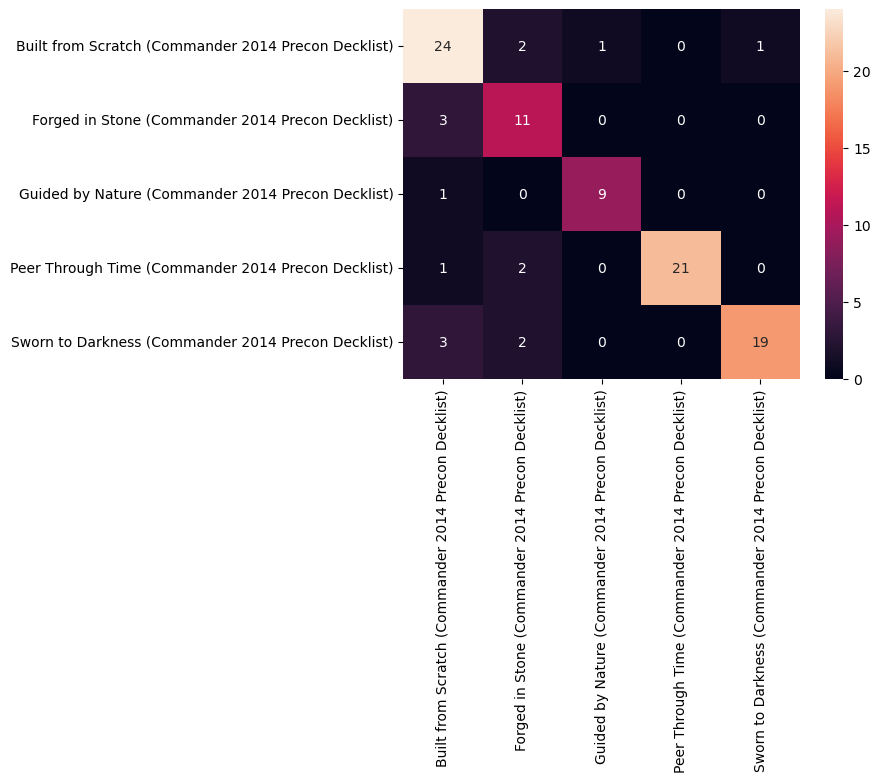

In [187]:
labels = {}
for i in range(len(ohe.categories_[0])): 
    labels[i] = ohe.categories_[0][i]
cfm_df = plot_confusion_matrix(y_tst_numerize(y_tst), best_y_hat, labels)

#### Analysis: 
84% Accuracy, while not fantastic, is an acceptable starting place. Noticeably, outside of small misclassification, the Guided by Nature, Peer Through Time, and Sworn to Darkness decks had the vast majority of their cards predicted properly, with Peer Through Time having all of its actual cards classified properly. However, there are considerably more incorrect predictions for those that were actually in the Built from Scratch and Forged in Fire decks, both of which seem to have their error distributed without pattern.  

### Algorithm #2: Logistic Regresion using Softmax

**The second algorithm we are using is Logistic Regression, using the softmax algorithm.**
This is the most complex algorithm that can handle multi-class scenarios we have access to that will not encounter runtime failings (that is, neural networks). Additionally, we chose this model to apply a gradient-descent-enabled model to this data, to explore how more computationally complex processes will interact with it. 

First, we need our sigmoid activation function, taken directly from my implementation in "[Homework] Logistic Regression." 

In [53]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return np.exp(z) / (1 + np.exp(z))

Next, our Softmax equation implementation, also from the same homework: 

In [54]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    return np.exp(z - np.max(z, axis = 1, keepdims = True)) / (np.sum(np.exp(z - np.max(z, axis = 1, keepdims = True)), axis = 1, keepdims = True))

Next, our generalized Negative Log Likelihood (NLL) implementation, again from the homework: 

In [55]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """
    
    return (float) (-1/y.shape[0]) * np.sum(y * np.log(probs))

Our batch procurement (once again, from said homework): 

In [56]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

**And finally, our Softmax-enabled logistic regression class:**

Note: this is taken directly from the implementation completed in "[Homework] Logistic Regression:" 

In [57]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (N, |K|) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """
            Args:
                X: Training features/data
                y: Training labels
                X_vld: Validation features/data
                y_vld: Validation labels
                seed: Seed used for initializing weights
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []

        self.W = np.random.rand(X.shape[1], y.shape[1])
        for e in range(self.epochs): 
            batches = get_batches(data_len = X.shape[0], batch_size = self.batch_size)
            for b in batches: 
                Z = X[b] @ self.W
                y_hat = softmax(Z)
                self.W = self.W - (self.alpha * ((1/len(b)) * (X[b].T @ (y_hat - y[b]))))
            probs = softmax(X @ self.W)
            self.trn_loss.append(nll_loss(y, probs))
            if X_vld is not None and y_vld is not None: 
                probs_vld = softmax(X_vld @ self.W)
                self.vld_loss.append(nll_loss(y_vld, probs_vld))
        
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        
        return np.argmax(X @ self.W, axis = 1)

Now, we fit and begin testing various epochs, batch sizes, and alpha values: 
- We started at 64 batches, dropped to 30, to 25, to 15, to 10, incrementing by ones in both directions around it, but no changes so it was left at 10
- Epochs did not change any accuracy from 100-500 
- Alpha, which started at 0.1 did not affect things in any way from 0.107 and greater 

**Training Data:**

Training Accuracy: 0.95625


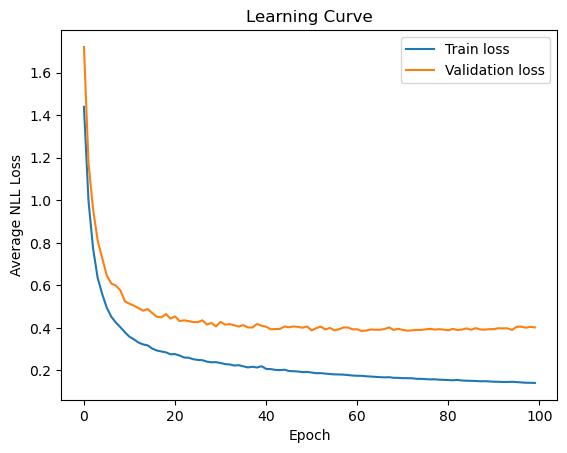

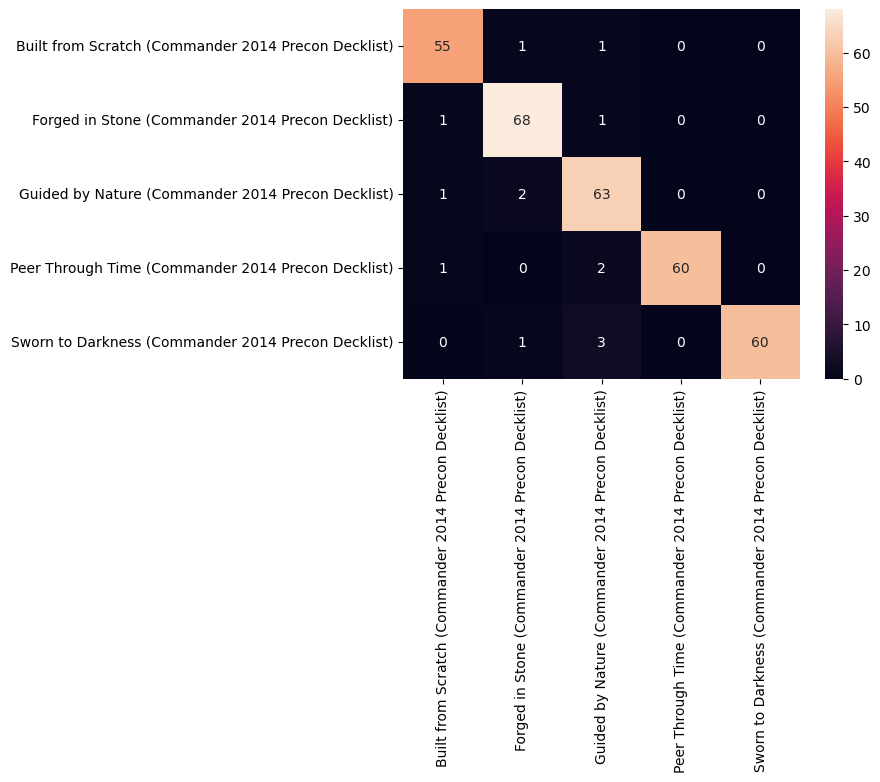

In [58]:
softreg = SoftmaxRegression(epochs=100, batch_size=10, alpha=0.107, seed=42)
softreg.fit(X_trn, y_trn, X_vld = X_vld, y_vld = y_vld)

y_hat = softreg.predict(X_trn)

acc = accuracy(np.argmax(y_trn, axis = 1), y_hat)
print(f"Training Accuracy: {acc}")

plt.plot(softreg.trn_loss, label = 'Train loss')
plt.plot(softreg.vld_loss, label = 'Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

cfm_df = plot_confusion_matrix(np.argmax(y_trn, axis = 1), y_hat, labels)

From those (for the most part) optimal values, we move onto our validation and testing data.

**Validation Data:**

Validation Accuracy: 0.85


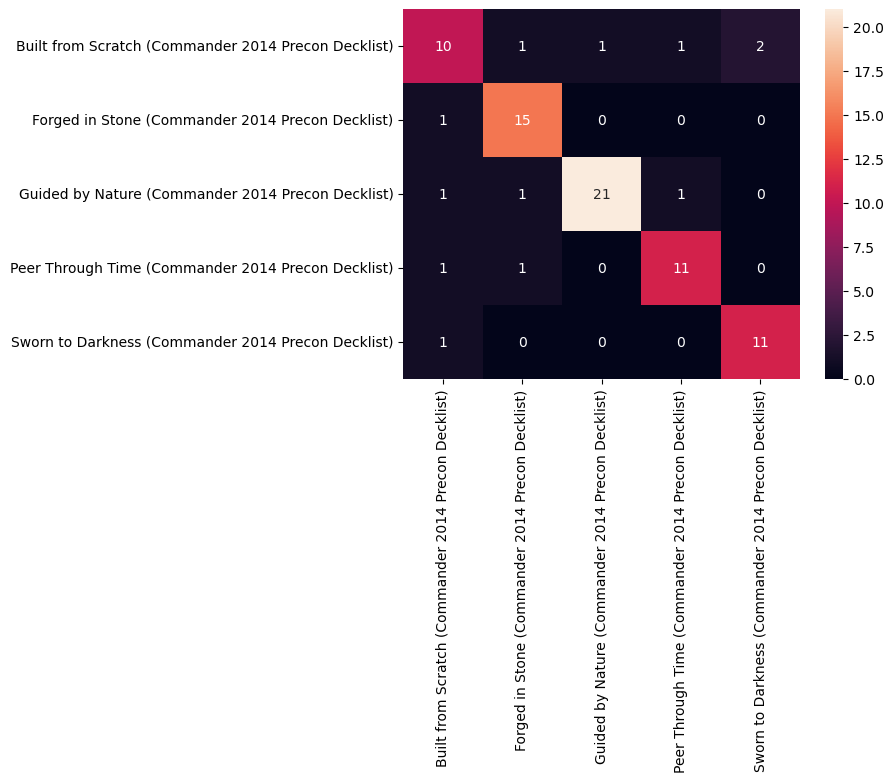

In [59]:
y_hat = softreg.predict(X_vld)

acc = accuracy(np.argmax(y_vld, axis = 1), y_hat)
print(f"Validation Accuracy: {acc}")

cfm_df = plot_confusion_matrix(np.argmax(y_vld, axis = 1), y_hat, labels)

**Testing Data:**

Testing Accuracy: 0.86


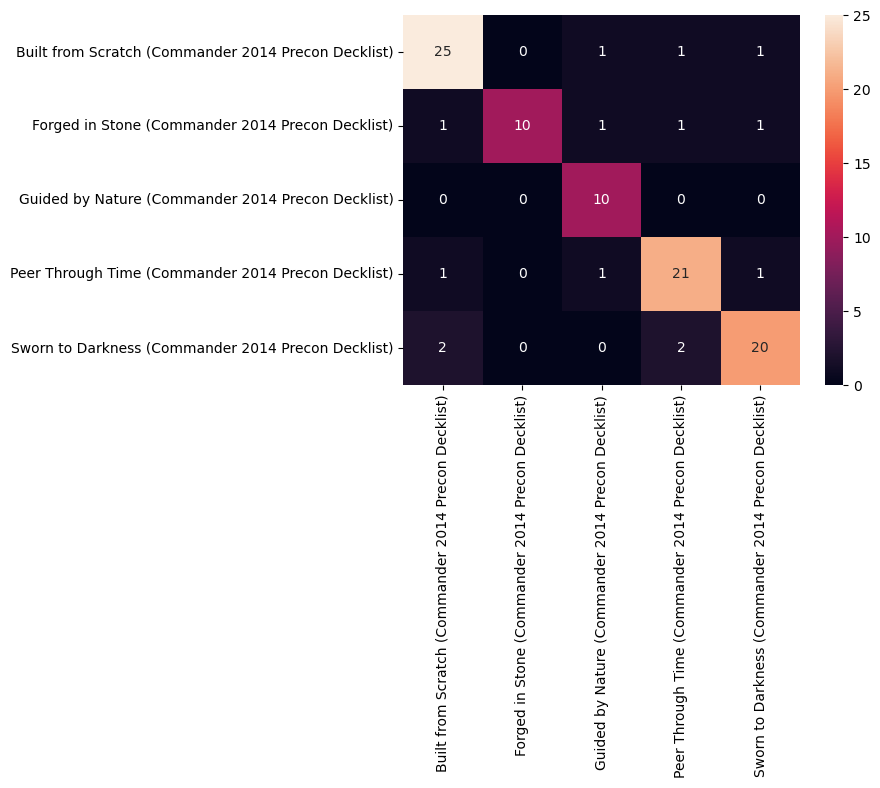

In [60]:
y_hat = softreg.predict(X_tst)

acc = accuracy(np.argmax(y_tst, axis = 1), y_hat)
print(f"Testing Accuracy: {acc}")

cfm_df = plot_confusion_matrix(np.argmax(y_tst, axis = 1), y_hat, labels)

#### Analysis: 
At the training level, our softmax model managed to achieve 95.625% accuracy, with a few errant classifications in the first 3 decks, and the latter 2 having accurately had every single one of their cards accurately classified (although there were additional cards misclassified as them). At the validation and testing levels, accuracy was 85% and 86%, respectively; errors at these levels appear to have random distribution with no discernible patterns. 

## Main Data Set Testing

In [190]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, ohe = get_preprocessed_data(pruned_card_list)

The main preprocessed dataset is, to put it lightly, *unruly*: 

In [230]:
X_trn.shape

(9984, 11926)

11,926 columns isn't the number of features we typically operate with with these kinds of algorithms, and thus we need to be careful and conservative with the implementations we do: 

### Algorithm #1: kNN

First, for kNN, we want to test how long it will take to compile even a single set of predictions. The following is a test run, used solely for the sake of time calculations: 

In [195]:
knn = KNearestNeighbors(k=1, distance_measure=cosine_similarity)
knn.fit(X_trn, y_trn)
y_hat = knn.predict(X_tst)
test_acc = accuracy(y=y_tst_numerize(y_tst), y_hat=y_hat)
print(f"predictions: {y_hat}")
print(f"accuracy: {test_acc}")

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row completed
row co

This took ~11 minutes to complete one iteration of kNN. However, our implementation sees us wanting to iterate from 1 to len(X_tst), which would be: 

In [231]:
len(X_tst)

3120

34,320 minutes, or 572 hours, or almost 24 days. No dice. We'll cut our iterations to len(X_tst) / 100, which is (when converted to an integer), 31 runs, or about 6-7 hours of uninterrupted runtime. We will only investigate further if the highest accuracy found is 31: 

In [199]:
best_k = 0.0
best_y_hat = []
best_acc = 0.0

for i in range(1, int(len(X_tst) / 100)): 
    # Initialize KNearestNeighbors object, k = current i
    knn = KNearestNeighbors(k=i, distance_measure=cosine_similarity)
    # Train KNN
    knn.fit(X_trn, y_trn)
    
    # Compute test predictions
    y_hat = knn.predict(X_tst)
    
    # Compute test accuracy
    test_acc = accuracy(y=y_tst_numerize(y_tst), y_hat=y_hat)
    if test_acc > best_acc: 
        best_k = i
        best_acc = test_acc
        best_y_hat = y_hat

print(f"Best k found: {best_k}")
        
print(f"Best predictions: {best_y_hat}")

print(f"Best accuracy: {best_acc: .2f}")

Best k found: 29
Best predictions: [116 107  36 ...  32  37  41]
Best accuracy:  0.07


And after one caffeinated (the computer, not myself) night later, we have our best results. And for the sake of data preservation because we do not want to run that again (credit https://www.geeksforgeeks.org/reading-and-writing-lists-to-a-file-in-python/): 

In [255]:
full_knn_best_y_hat = best_y_hat
print(full_knn_best_y_hat)
full_knn_best_acc = best_acc
print(best_acc)
with open('best_knn_y_hat.txt', 'w+') as f: 
    f.write('best_y_hat: \n')
    for pred in full_knn_best_y_hat: 
        f.write('%s\n' %pred)
    f.write('\n')
    f.write('best acc: %s' %full_knn_best_acc)
f.close()

[116 107  36 ...  32  37  41]
0.07467948717948718


#### Recreating our Visualizations from Earlier: 

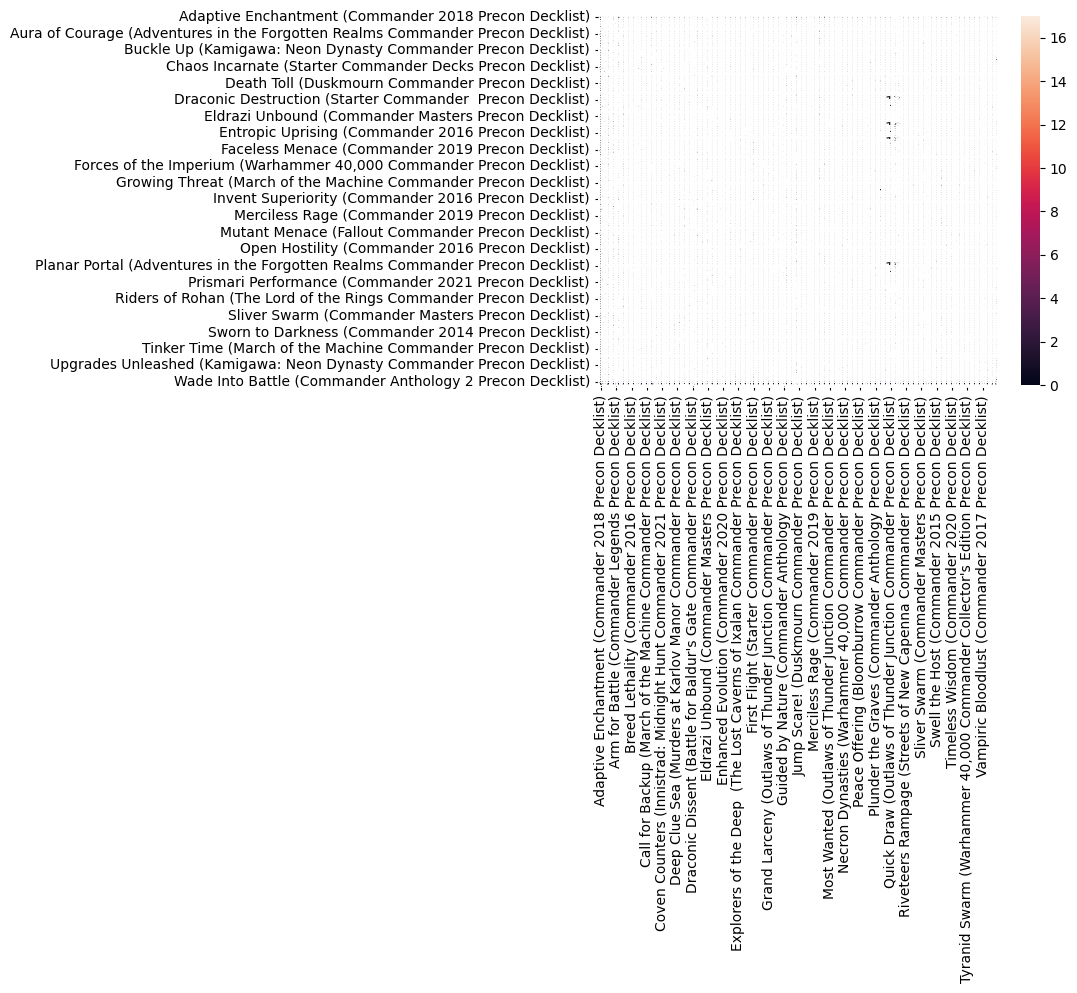

In [211]:
labels = {}
for i in range(len(ohe.categories_[0])): 
    labels[i] = ohe.categories_[0][i]
cfm_df = plot_confusion_matrix(y_tst_numerize(y_tst), best_y_hat, labels)

Well that's not much help. Nor is outputting best_y_hat and the numerized form of y_tst: 

In [218]:
print(best_y_hat.tolist())

[116, 107, 36, 24, 33, 3, 44, 3, 126, 116, 116, 36, 79, 136, 12, 43, 42, 6, 4, 42, 2, 103, 15, 35, 144, 42, 16, 36, 21, 66, 4, 38, 35, 42, 106, 42, 115, 95, 137, 115, 116, 32, 78, 6, 15, 87, 33, 42, 35, 42, 25, 126, 106, 42, 106, 115, 76, 6, 62, 116, 50, 27, 0, 0, 115, 1, 41, 129, 116, 116, 5, 106, 31, 24, 41, 106, 38, 33, 42, 137, 42, 16, 71, 42, 6, 42, 12, 3, 35, 75, 47, 42, 32, 106, 6, 46, 116, 49, 78, 127, 85, 106, 11, 1, 42, 33, 106, 23, 112, 115, 56, 106, 115, 33, 117, 115, 42, 149, 43, 6, 42, 133, 75, 117, 16, 32, 6, 114, 33, 115, 42, 116, 12, 2, 71, 85, 144, 104, 115, 38, 71, 24, 51, 23, 42, 41, 115, 103, 55, 55, 66, 95, 16, 78, 42, 127, 95, 136, 42, 32, 42, 71, 19, 106, 76, 126, 33, 58, 116, 116, 109, 55, 44, 66, 59, 115, 38, 42, 115, 42, 36, 116, 90, 42, 0, 116, 79, 6, 79, 72, 65, 112, 7, 42, 37, 5, 11, 1, 116, 115, 30, 42, 116, 33, 103, 8, 27, 124, 42, 33, 99, 9, 36, 137, 16, 106, 116, 42, 42, 35, 60, 42, 6, 71, 6, 33, 3, 3, 76, 50, 106, 55, 52, 144, 110, 44, 42, 35, 27, 8, 

In [221]:
print(y_tst_numerize(y_tst).tolist())

[102, 20, 18, 152, 118, 72, 22, 87, 130, 72, 58, 4, 131, 136, 149, 130, 85, 60, 4, 116, 104, 97, 122, 77, 62, 98, 84, 135, 155, 118, 82, 72, 98, 109, 0, 40, 47, 95, 5, 126, 141, 45, 155, 59, 55, 104, 129, 3, 77, 34, 25, 10, 65, 56, 87, 126, 123, 74, 62, 108, 50, 56, 64, 54, 143, 11, 69, 28, 78, 137, 146, 10, 94, 61, 41, 103, 153, 57, 72, 122, 140, 10, 155, 131, 9, 82, 98, 38, 21, 109, 129, 126, 29, 132, 52, 80, 141, 13, 94, 50, 153, 155, 70, 70, 97, 33, 135, 79, 114, 42, 92, 1, 101, 87, 90, 106, 40, 150, 10, 39, 53, 28, 32, 17, 96, 86, 20, 30, 84, 106, 116, 28, 131, 58, 155, 66, 62, 111, 53, 124, 10, 121, 88, 22, 34, 41, 53, 124, 10, 79, 39, 62, 154, 98, 70, 58, 95, 136, 70, 109, 101, 115, 22, 26, 60, 77, 44, 97, 141, 38, 23, 139, 44, 63, 64, 136, 132, 119, 106, 93, 34, 103, 9, 81, 152, 49, 24, 80, 89, 28, 65, 74, 123, 126, 94, 58, 105, 1, 137, 47, 141, 103, 140, 137, 1, 1, 152, 56, 68, 46, 38, 122, 112, 90, 147, 25, 3, 76, 35, 55, 131, 81, 81, 0, 71, 107, 77, 63, 61, 50, 121, 83, 154,

We do have one last trick we can try. By iterating through best_y_hat (or the saved form) and y_tst, outputting where they are equal, and fetching that member of y_tst, inverse-transformed back to the original class by our OHE instance, we can visualize some classification: 

In [241]:
numerized = y_tst_numerize(y_tst).tolist()
correct_predictions_knn = []
for i in range(len(full_knn_best_y_hat)): 
    if full_knn_best_y_hat[i] == numerized[i]: 
        print("Correct Prediction in: " + ohe.inverse_transform(y_tst)[i])
        correct_predictions_knn.append(ohe.inverse_transform(y_tst)[i])        

["Correct Prediction in: The Ruinous Powers (Warhammer 40,000 Commander Collector's Edition Precon Decklist)"]
['Correct Prediction in: Arcane Maelstrom (Commander 2020 Precon Decklist)']
["Correct Prediction in: Necron Dynasties (Warhammer 40,000 Commander Collector's Edition Precon Decklist)"]
['Correct Prediction in: Creative Energy (Modern Horizons 3 Commander Precon Decklist)']
["Correct Prediction in: Forces of the Imperium (Warhammer 40,000 Commander Collector's Edition Precon Decklist)"]
['Correct Prediction in: Eternal Bargain (Commander 2013 Precon Decklist)']
["Correct Prediction in: Eldrazi Incursion Collector's Edition (Modern Horizons 3 Commander Precon Decklist)"]
['Correct Prediction in: Devour for Power (Commander Anthology 2 Precon Decklist)']
["Correct Prediction in: Eldrazi Incursion Collector's Edition (Modern Horizons 3 Commander Precon Decklist)"]
["Correct Prediction in: Necron Dynasties (Warhammer 40,000 Commander Collector's Edition Precon Decklist)"]
["Correc

['Correct Prediction in: Mirror Mastery (Commander 2011 Precon Decklist)']
['Correct Prediction in: Arm for Battle (Commander Legends Precon Decklist)']
['Correct Prediction in: Painbow (Dominaria United Commander Precon Decklist)']
['Correct Prediction in: Devour for Power (Commander 2011 Precon Decklist)']
['Correct Prediction in: Eldrazi Incursion (Modern Horizons 3 Commander Precon Decklist)']
['Correct Prediction in: Sworn to Darkness (Commander 2014 Precon Decklist)']
["Correct Prediction in: Mishra's Burnished Banner (The Brothers' War Commander Precon Decklist)"]
["Correct Prediction in: Necron Dynasties (Warhammer 40,000 Commander Collector's Edition Precon Decklist)"]
['Correct Prediction in: Eldrazi Incursion (Modern Horizons 3 Commander Precon Decklist)']
["Correct Prediction in: Urza's Iron Alliance (The Brothers' War Commander Precon Decklist)"]
['Correct Prediction in: Raining Cats and Dogs (Secret Lair Commander 2024 Precon Decklist)']
['Correct Prediction in: Forged in

And counting all of the successful classifications and which deck they occurred in yields us: 

In [253]:
print(pd.Series(correct_predictions_knn).value_counts().to_string())
print("\n\nNumber of decks which received at least 1 accurate classification: " + str(len(pd.Series(correct_predictions_knn).value_counts())))

[Eldrazi Incursion Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                     12
[Eldrazi Unbound (Commander Masters Precon Decklist)]                                                     11
[The Ruinous Powers (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                     10
[Necron Dynasties (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                       10
[Mishra's Burnished Banner (The Brothers' War Commander Precon Decklist)]                                 10
[Devour for Power (Commander 2011 Precon Decklist)]                                                        9
[Raining Cats and Dogs (Secret Lair Commander 2024 Precon Decklist)]                                       8
[Tyranid Swarm (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                           8
[Forces of the Imperium (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                  8
[From Cute to Brute

#### Analysis: 
Obviously, 7% accuracy is disappointing to say the least. However, there is valuable innformation to be mined from our output value_counts. The kNN model is incapable of understanding that each deck can only have 100 cards classified to it; thus, if we ever have a deck that is a "similarity black hole," so to speak, it will keep having cards classified to it regardless of if it is a "finished" deck. However, we do see some trends in the (relatively) high-performing decks: the two highest scoring decks, Eldrazi Incursion and Eldrazi Unbound, are both themed around the eponymous Eldrazi creatures. The Eldrazi are notable for being colorless and utilizing their own unique kind of "colorless mana," and for being big, dumb, game-ending creatures that are incredibly lethal if they enter play. Because of this, they're easily seperable from other card types, and it appears the model was able to learn and recognize this. The other major factor we can glean, from the next two highest scoring decks, as well as subsequent results, is that "Universes Beyond" decks (that is, those that are crossovers with other franchises) are much easier for the model to recognize the similarities between. This is likely because, in both name and text body, these cards have more uniqueness to them than those from the main Magic world, and also only exist in sets of 4 (or 8, for those with collectors variants). Secret Lair decks, with their scattershot printings (thanks to the unique reprint system called "The List"), were also generally higher-performing. In spite of the 7% accuracy of the model, there are still visibly learned trends in the data. 

### Algorithm #2: Softmax Regression

Like kNN (although thankfully not as rough), running regressions will balloon in runtime if we are not careful. The following results are at the greatest I was comfortable increasing the runtime to, and the validation and test accuracy appeared to plateau as well. 

In [254]:
len(y_tst) / 10

312.0

The following modifcations were made to each variable until we reached the current final stage: 
- Batch size started at len(y_tst) / 10, dropped to 100, then 30
- Epochs started at 100 and were then dropped to 5
- Alpha went up from 0.107 to 0.5, then to 0.9
- Finally, epochs up to 10, then 20, then 30, 50, 80, and finally 125

Training Accuracy: 0.6251001602564102


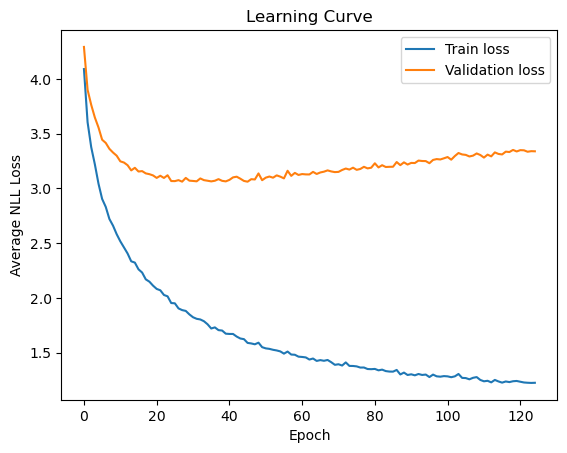

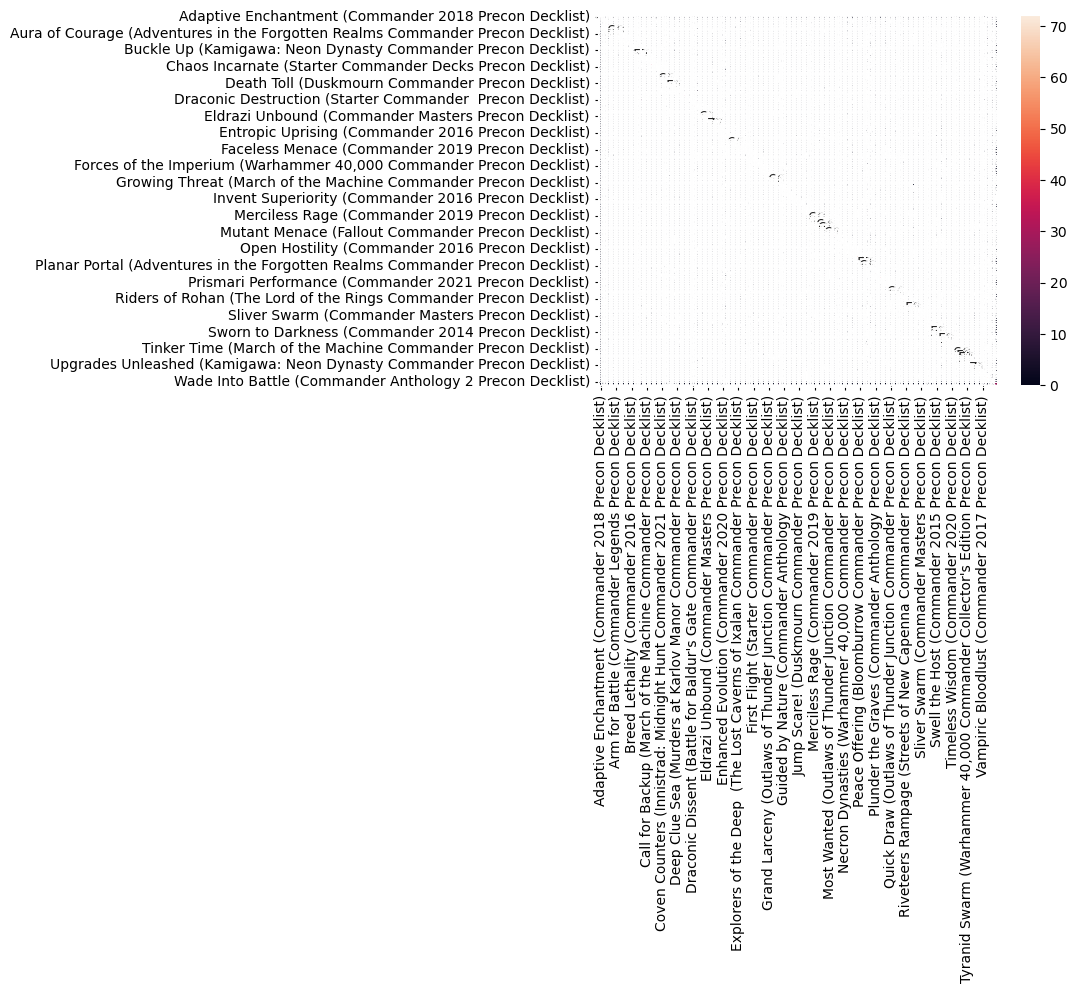

In [222]:
softreg = SoftmaxRegression(epochs=125, batch_size=30, alpha=0.9, seed=42)
softreg.fit(X_trn, y_trn, X_vld = X_vld, y_vld = y_vld)

y_hat = softreg.predict(X_trn)

acc = accuracy(np.argmax(y_trn, axis = 1), y_hat)
print(f"Training Accuracy: {acc}")

plt.plot(softreg.trn_loss, label = 'Train loss')
plt.plot(softreg.vld_loss, label = 'Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

cfm_df = plot_confusion_matrix(np.argmax(y_trn, axis = 1), y_hat, labels)

Before we validate and test our data, we should follow the same steps we did with k-NN (mainly, data preservation and textual modelling), but not printing every step of the way. 

In [262]:
full_softreg_y_trn_hat = y_hat
print(full_softreg_y_trn_hat)
with open('best_softreg_y_trn_hat.txt', 'w+') as f: 
    f.write('best_y_hat: \n')
    for pred in full_softreg_y_trn_hat: 
        f.write('%s\n' %pred)
f.close()

[ 46 154  72 ...  72 146 114]


In [261]:
correct_predictions_softreg = []
numerized_trn = y_tst_numerize(y_trn).tolist()
for i in range(len(full_softreg_y_trn_hat)): 
    if full_softreg_y_trn_hat[i] == numerized_trn[i]: 
        correct_predictions_softreg.append(ohe.inverse_transform(y_trn)[i])        
print(pd.Series(correct_predictions_softreg).value_counts().to_string())
print("\n\nNumber of decks which received at least 1 accurate classification: " + str(len(pd.Series(correct_predictions_softreg).value_counts())))

[Enchantress Rubinia (Magic Online Theme Deck Precon Decklist)]                                           72
[Urza's Iron Alliance (The Brothers' War Commander Precon Decklist)]                                      71
[Mind Flayarrrs (Battle for Baldur's Gate Commander Precon Decklist)]                                     69
[Planar Portal (Adventures in the Forgotten Realms Commander Precon Decklist)]                            68
[Arm for Battle (Commander Legends Precon Decklist)]                                                      68
[Graveyard Overdrive Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                   66
[Creative Energy Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                       65
[Mirror Mastery (Commander 2011 Precon Decklist)]                                                         64
[Reap the Tides (Commander Legends Precon Decklist)]                                                      64
[Mishra's Burnished

Validation Accuracy: 0.25761217948717946


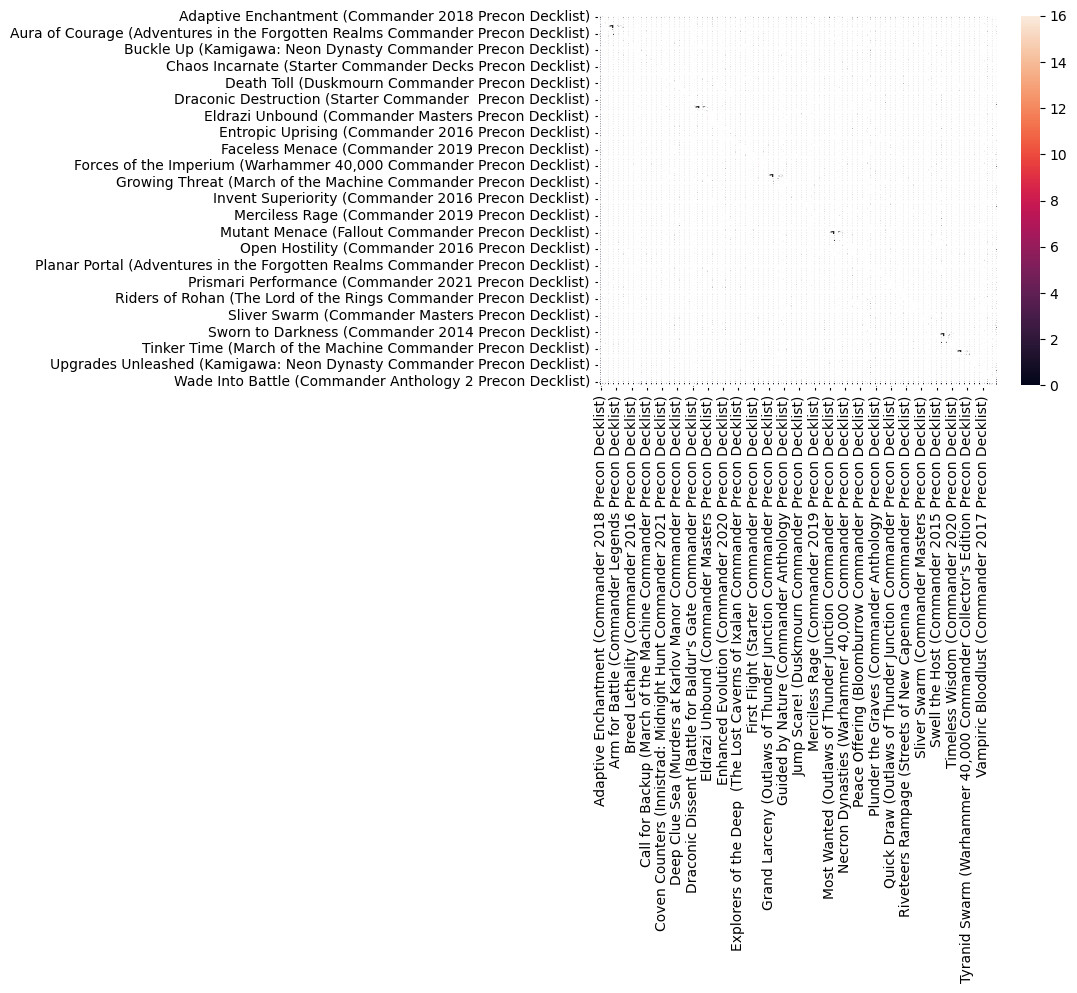

In [264]:
y_hat_vld = softreg.predict(X_vld)

acc = accuracy(np.argmax(y_vld, axis = 1), y_hat_vld)
print(f"Validation Accuracy: {acc}")

cfm_df = plot_confusion_matrix(np.argmax(y_vld, axis = 1), y_hat_vld, labels)

In [268]:
full_softreg_y_vld_hat = y_hat_vld
print(full_softreg_y_vld_hat)
print()
with open('best_softreg_y_vld_hat.txt', 'w+') as f: 
    f.write('best_y_hat: \n')
    for pred in full_softreg_y_vld_hat: 
        f.write('%s\n' %pred)
f.close()
correct_predictions_softreg_vld = []
numerized_vld = y_tst_numerize(y_vld).tolist()
for i in range(len(full_softreg_y_vld_hat)): 
    if full_softreg_y_vld_hat[i] == numerized_vld[i]: 
        correct_predictions_softreg_vld.append(ohe.inverse_transform(y_vld)[i])        
print(pd.Series(correct_predictions_softreg_vld).value_counts().to_string())
print("\n\nNumber of decks which received at least 1 accurate classification: " + str(len(pd.Series(correct_predictions_softreg_vld).value_counts())))

[ 93 107  93 ... 154 113  56]

[The Ruinous Powers (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                     16
[Tricky Terrain Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                        16
[Graveyard Overdrive Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                   14
[Nature of the Beast (Commander 2013 Precon Decklist)]                                                    13
[Eldrazi Incursion (Modern Horizons 3 Commander Precon Decklist)]                                         13
[Arm for Battle (Commander Legends Precon Decklist)]                                                      13
[Urza's Iron Alliance (The Brothers' War Commander Precon Decklist)]                                      12
[Sworn to Darkness (Commander 2014 Precon Decklist)]                                                      11
[Mind Flayarrrs (Battle for Baldur's Gate Commander Precon Decklist)]                            

Testing Accuracy: 0.24743589743589745


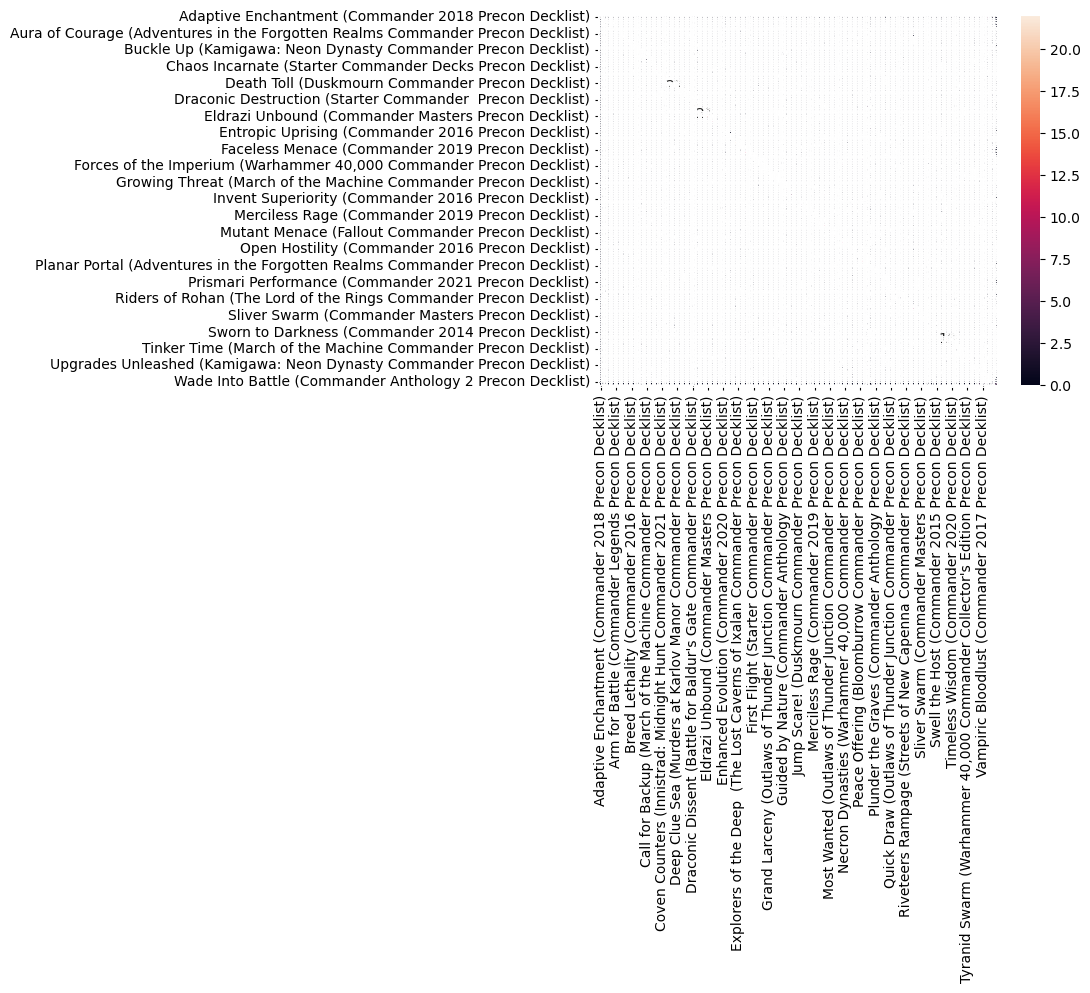

In [267]:
y_hat_tst = softreg.predict(X_tst)

acc = accuracy(np.argmax(y_tst, axis = 1), y_hat_tst)
print(f"Testing Accuracy: {acc}")

cfm_df = plot_confusion_matrix(np.argmax(y_tst, axis = 1), y_hat_tst, labels)

In [269]:
full_softreg_y_tst_hat = y_hat_tst
print(full_softreg_y_tst_hat)
print()
with open('best_softreg_y_tst_hat.txt', 'w+') as f: 
    f.write('best_y_hat: \n')
    for pred in full_softreg_y_tst_hat: 
        f.write('%s\n' %pred)
f.close()
correct_predictions_softreg_tst = []
numerized_tst = y_tst_numerize(y_tst).tolist()
for i in range(len(full_softreg_y_tst_hat)): 
    if full_softreg_y_tst_hat[i] == numerized_tst[i]: 
        correct_predictions_softreg_tst.append(ohe.inverse_transform(y_tst)[i])        
print(pd.Series(correct_predictions_softreg_tst).value_counts().to_string())
print("\n\nNumber of decks which received at least 1 accurate classification: " + str(len(pd.Series(correct_predictions_softreg_tst).value_counts())))

[113 146  18 ...  32 100  26]

[Deathdancer Xira (Magic Online Theme Deck Precon Decklist)]                                              22
[Eldrazi Incursion Collector's Edition (Modern Horizons 3 Commander Precon Decklist)]                     21
[The Ruinous Powers (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                     18
[Exit from Exile (Battle for Baldur's Gate Commander Precon Decklist)]                                    17
[Forces of the Imperium (Warhammer 40,000 Commander Collector's Edition Precon Decklist)]                 17
[Eldrazi Incursion (Modern Horizons 3 Commander Precon Decklist)]                                         16
[Sliver Swarm (Commander Masters Precon Decklist)]                                                        14
[Enchantress Rubinia (Magic Online Theme Deck Precon Decklist)]                                           14
[Eldrazi Unbound (Commander Masters Precon Decklist)]                                            

#### Analysis: 
62.5%, for the scale of our data set, is thrilling to see for our training data. Additionally, we see that all 156 decks had a card correctly classified to it, a milestone compared to kNN barely reaching halfway to this point. Additionally, there seem to be very few trends as to these classifications; the top performing deck being the Magic Online precon that predates all others seems to have had its greatest success because of this, however beyond that, there appear to be no tendencies outside of potentially collector's editions of decks having greater success. The validation and testing data both had only about 25% accuracy; validation achieved 25.8%, whereas testing achieved 24.7%. However, something that immediately stands out is that testing managed to classify at least one card to 136 of the decks, whereas validation, even with its higher accuracy, classified correctly at least once to only 126 of the decks. Ironically, both validation and testing reaffirm the trends we discussed earlier; the 3 highest scoring decks for the validation set were collector's editions. Additionally, the testing data saw its highest scoring deck be the other, even older Magic Online precon, and the aforementioned one was its 8th highest. Ultimately, while overall accuracy for validation and testing were only around 25%, we can conclude that the model was able to learn trends in the decks. 